### Imports for Analysis

In [ ]:
!pip install ktrain

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [7]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import date

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from textblob import TextBlob

import ktrain
from ktrain import text

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## DataFrame read from .csv file - Tweets from the selected theme

In [172]:
twitter_dataframe = pd.read_csv("result.csv")

twitter_dataframe.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count
0,2021-07-23 23:59:59,aaroncachua,_ayer1 yeah Covid is still real bud,[],269
1,2021-07-23 23:59:58,aominous2000,Keep an eye on COVID stats. https://t.co/okJ7JClKIz Ironically the coyote the baby and the teddy bear pictured have nothing to do with the story.,[],3375
2,2021-07-23 23:59:58,vancouverislgal,Good luck in your COVID cesspool.,[],0
3,2021-07-23 23:59:58,Alex_K_F_M,_04 Far more ppl will die from Covid then the incredibly small percentage of folks who experience post-injection complications You only care about a very small minority of folks versus society at large.,[],1035
4,2021-07-23 23:59:58,realchadstenzel,Sit on it https://t.co/jqL3soQBNx,[],808


In [173]:
twitter_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Time             500 non-null    object
 1   UserName         500 non-null    object
 2   Tweet_text       500 non-null    object
 3   All_Hashtags     500 non-null    object
 4   Followers_count  500 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 19.7+ KB


## Sentiment Analysis with Different Tools

### TextBlob Sentiment Analysis

In [174]:
twitter_dataframe_TextBlob = twitter_dataframe.copy()

In [175]:
def textblob_analysis(news_headline):
  analysis = TextBlob(news_headline)
  return analysis.sentiment.polarity

In [176]:
# Sentiment 'polarity' calculation for tweets
twitter_dataframe_TextBlob['Compound'] = twitter_dataframe_TextBlob['Tweet_text'].apply(lambda tweet: textblob_analysis(tweet))

In [177]:
twitter_dataframe_TextBlob.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound
0,2021-07-23 23:59:59,aaroncachua,_ayer1 yeah Covid is still real bud,[],269,0.200000
1,2021-07-23 23:59:58,aominous2000,Keep an eye on COVID stats. https://t.co/okJ7JClKIz Ironically the coyote the baby and the teddy bear pictured have nothing to do with the story.,[],3375,0.000000
2,2021-07-23 23:59:58,vancouverislgal,Good luck in your COVID cesspool.,[],0,0.700000
3,2021-07-23 23:59:58,Alex_K_F_M,_04 Far more ppl will die from Covid then the incredibly small percentage of folks who experience post-injection complications You only care about a very small minority of folks versus society at large.,[],1035,0.039881
4,2021-07-23 23:59:58,realchadstenzel,Sit on it https://t.co/jqL3soQBNx,[],808,0.000000


In [178]:
# Label the tweets by the 'Compound' - by Sentiment Polarity values
# ( In TextBlob the scale moves between -1 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0:
      return 'neutral'
  elif 0 < sentiment_value <= 0.3:
      return 'weakly_positive'
  elif 0.3 < sentiment_value <= 0.6:
      return 'positive'
  elif 0.6 < sentiment_value <= 1:
      return 'strongly_positive'
  elif -0.3 < sentiment_value <= 0:
      return 'weakly_negative'
  elif -0.6 < sentiment_value <= -0.3:
      return 'negative'
  elif -1 < sentiment_value <= -0.6:
      return 'strongly_negative'

In [179]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_TextBlob['Sentiment'] = twitter_dataframe_TextBlob['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_TextBlob['Tool'] = 'TextBlob'

In [180]:
twitter_dataframe_TextBlob.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-07-23 23:59:59,aaroncachua,_ayer1 yeah Covid is still real bud,[],269,0.200000,weakly_positive,TextBlob
1,2021-07-23 23:59:58,aominous2000,Keep an eye on COVID stats. https://t.co/okJ7JClKIz Ironically the coyote the baby and the teddy bear pictured have nothing to do with the story.,[],3375,0.000000,neutral,TextBlob
2,2021-07-23 23:59:58,vancouverislgal,Good luck in your COVID cesspool.,[],0,0.700000,strongly_positive,TextBlob
3,2021-07-23 23:59:58,Alex_K_F_M,_04 Far more ppl will die from Covid then the incredibly small percentage of folks who experience post-injection complications You only care about a very small minority of folks versus society at large.,[],1035,0.039881,weakly_positive,TextBlob
4,2021-07-23 23:59:58,realchadstenzel,Sit on it https://t.co/jqL3soQBNx,[],808,0.000000,neutral,TextBlob


In [181]:
# Sentiment informations with TextBlob
twitter_dataframe_TextBlob['Sentiment'].value_counts()

weakly_positive      157
neutral              142
weakly_negative       80
positive              56
negative              47
strongly_positive     12
strongly_negative      5
Name: Sentiment, dtype: int64

### NLTK Sentiment Analysis

In [182]:
twitter_dataframe_NLTK = twitter_dataframe.copy()

In [183]:
sia=SentimentIntensityAnalyzer()

# Sentiment 'polarity' calculation for tweets
twitter_dataframe_NLTK['Compound'] = twitter_dataframe_NLTK['Tweet_text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])

In [184]:
# Label the tweets by the 'Compound' - by Sentiment Polarity values
# ( In NLTK the scale moves between -1 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0:
      return 'neutral'
  elif 0 < sentiment_value <= 0.3:
      return 'weakly_positive'
  elif 0.3 < sentiment_value <= 0.6:
      return 'positive'
  elif 0.6 < sentiment_value <= 1:
      return 'strongly_positive'
  elif -0.3 < sentiment_value <= 0:
      return 'weakly_negative'
  elif -0.6 < sentiment_value <= -0.3:
      return 'negative'
  elif -1 < sentiment_value <= -0.6:
      return 'strongly_negative'

In [185]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_NLTK['Sentiment'] = twitter_dataframe_NLTK['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_NLTK['Tool'] = 'NLTK'

In [186]:
twitter_dataframe_NLTK.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-07-23 23:59:59,aaroncachua,_ayer1 yeah Covid is still real bud,[],269,0.2960,weakly_positive,NLTK
1,2021-07-23 23:59:58,aominous2000,Keep an eye on COVID stats. https://t.co/okJ7JClKIz Ironically the coyote the baby and the teddy bear pictured have nothing to do with the story.,[],3375,0.0000,neutral,NLTK
2,2021-07-23 23:59:58,vancouverislgal,Good luck in your COVID cesspool.,[],0,0.7096,strongly_positive,NLTK
3,2021-07-23 23:59:58,Alex_K_F_M,_04 Far more ppl will die from Covid then the incredibly small percentage of folks who experience post-injection complications You only care about a very small minority of folks versus society at large.,[],1035,-0.2415,weakly_negative,NLTK
4,2021-07-23 23:59:58,realchadstenzel,Sit on it https://t.co/jqL3soQBNx,[],808,0.0000,neutral,NLTK


In [187]:
# Sentiment informations with NLTK - vader lexicon
twitter_dataframe_NLTK['Sentiment'].value_counts()

neutral              95
positive             93
strongly_negative    74
negative             73
weakly_negative      67
strongly_positive    56
weakly_positive      42
Name: Sentiment, dtype: int64

### RNN (Recurrent neural network) Sentiment Analysis

In [188]:
twitter_dataframe_RNN = twitter_dataframe.copy()

In [189]:
# LOAD previous model
model = keras.models.load_model("RNN_2020-04-17.h5")

In [23]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [ ]:
# Test and tran datasets using the tensorflow datasets possibility
dataSet, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataSet, test_dataSet = dataSet['train'], dataSet['test']
encoder = info.features['text'].encoder

In [ ]:
# Set the test and train datasets with the batch size and suffle
padded_shapes = ([None], ())
train_dataSet = train_dataSet.shuffle(BUFFER_SIZE).padded_batch(BATCH_SIZE, padded_shapes=padded_shapes)
test_dataSet = test_dataSet.padded_batch(BATCH_SIZE, padded_shapes=padded_shapes)

In [ ]:
# RNN model
model = tf.keras.Sequential([tf.keras.layers.Embedding(encoder.vocab_size, 64),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                              tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                              tf.keras.layers.Dense(64, activation='relu'),
                              tf.keras.layers.Dropout(0.5),
                              tf.keras.layers.Dense(1, activation='sigmoid')])

In [ ]:
# To configure the training process
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
# Model Train
fit_model = model.fit(train_dataSet, epochs=10, 
                      validation_data=test_dataSet, 
                      validation_steps=30)

Epoch 1/10
391/391 [==============================] - 81s 193ms/step - loss: 0.6551 - accuracy: 0.5831 - val_loss: 0.4737 - val_accuracy: 0.7891
Epoch 2/10
391/391 [==============================] - 75s 191ms/step - loss: 0.3658 - accuracy: 0.8559 - val_loss: 0.3462 - val_accuracy: 0.8661
Epoch 3/10
391/391 [==============================] - 76s 192ms/step - loss: 0.2647 - accuracy: 0.9058 - val_loss: 0.3690 - val_accuracy: 0.8599
Epoch 4/10
391/391 [==============================] - 76s 192ms/step - loss: 0.2181 - accuracy: 0.9291 - val_loss: 0.3650 - val_accuracy: 0.8661
Epoch 5/10
391/391 [==============================] - 76s 194ms/step - loss: 0.1921 - accuracy: 0.9382 - val_loss: 0.3897 - val_accuracy: 0.8599
Epoch 6/10
391/391 [==============================] - 77s 196ms/step - loss: 0.1687 - accuracy: 0.9488 - val_loss: 0.4191 - val_accuracy: 0.8547
Epoch 7/10
391/391 [==============================] - 76s 193ms/step - loss: 0.1476 - accuracy: 0.9568 - val_loss: 0.4688 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_dataSet)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 35s 89ms/step - loss: 0.5300 - accuracy: 0.8473
Test Loss: 0.5299970507621765
Test Accuracy: 0.8472800254821777


In [24]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(fit_model, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(fit_model, 'loss')

In [ ]:
# Save the trained model
today = date.today()
model.save('RNN_' + str(today) + '.h5')

In [192]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [193]:
# Predict the 'Compound' - Sentiment values
def predict(post, pad):
  encoded_sample_pred_text = encoder.encode(post)
  if pad:
      encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return predictions

In [30]:
sample_text = ('This movie was awesome. The acting was incredible.')
prediction_ex = predict(sample_text, pad=True)
prediction_ex

array([[0.91235095]], dtype=float32)

In [31]:
sample_text_2 = ('This movie was so so. The acting was medicore.')
prediction_ex_2 = predict(sample_text_2, pad=True)
prediction_ex_2

array([[0.5152679]], dtype=float32)

In [32]:
sample_text_3 = ('This movie was wierd. The acting was annoying.')
prediction_ex_3 = predict(sample_text_3, pad=True)
prediction_ex_3

array([[0.33125496]], dtype=float32)

In [194]:
# Predict the tweets 'Compound' - Sentiment values
twitter_dataframe_RNN['Compound'] = twitter_dataframe_RNN['Tweet_text'].apply(lambda tweet: float(predict(tweet, pad=True)))

In [221]:
# Label the tweets by the 'Compound' - by Sentiment prediction values
# ( In RNN the scale moves between 0 and 1 )
def sentiment_declareation(sentiment_value):
  if sentiment_value == 0.5:
      return 'neutral'
  elif 0.5 < sentiment_value <= 0.7:
      return 'weakly_positive'
  elif 0.7 < sentiment_value <= 0.9:
      return 'positive'
  elif 0.9 < sentiment_value <= 1:
      return 'strongly_positive'
  elif 0.3 < sentiment_value < 0.5:
      return 'weakly_negative'
  elif 0.1 < sentiment_value <= 0.3:
      return 'negative'
  elif 0 < sentiment_value <= 0.1:
      return 'strongly_negative'

In [222]:
# Sentiment labels for tweets after the 'Compound'
twitter_dataframe_RNN['Sentiment'] = twitter_dataframe_RNN['Compound'].apply(lambda value: sentiment_declareation(value))

# Set the Sentiment analysis tool name
twitter_dataframe_RNN['Tool'] = 'RNN'

In [223]:
twitter_dataframe_RNN.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
0,2021-07-23 23:59:59,aaroncachua,_ayer1 yeah Covid is still real bud,[],269,0.680740,weakly_positive,RNN
1,2021-07-23 23:59:58,aominous2000,Keep an eye on COVID stats. https://t.co/okJ7JClKIz Ironically the coyote the baby and the teddy bear pictured have nothing to do with the story.,[],3375,0.253428,negative,RNN
2,2021-07-23 23:59:58,vancouverislgal,Good luck in your COVID cesspool.,[],0,0.788868,positive,RNN
3,2021-07-23 23:59:58,Alex_K_F_M,_04 Far more ppl will die from Covid then the incredibly small percentage of folks who experience post-injection complications You only care about a very small minority of folks versus society at large.,[],1035,0.376410,weakly_negative,RNN
4,2021-07-23 23:59:58,realchadstenzel,Sit on it https://t.co/jqL3soQBNx,[],808,0.404436,weakly_negative,RNN


In [224]:
# Sentiment informations with RNN
twitter_dataframe_RNN['Sentiment'].value_counts()

negative             135
positive             109
weakly_negative       91
weakly_positive       83
strongly_negative     43
strongly_positive     39
Name: Sentiment, dtype: int64

In [ ]:
print(twitter_dataframe_RNN)

In [ ]:
twitter_dataframe_RNN.isnull().sum(axis = 0)

### BERT Sentiment Analysis

In [39]:
twitter_dataframe_BERT = twitter_dataframe.copy()

In [40]:
data_train = pd.read_excel('train.xlsx', dtype=str)
data_train.head()

,Reviews,Sentiment
0,"When I first tuned in on this morning news, I ...",neg
1,"Mere thoughts of ""Going Overboard"" (aka ""Babes...",neg
2,Why does this movie fall WELL below standards?...,neg
3,Wow and I thought that any Steven Segal movie ...,neg
4,"The story is seen before, but that does'n matt...",neg


In [41]:
data_test = pd.read_excel('test.xlsx', dtype=str)
data_test.head()

,Reviews,Sentiment
0,Who would have thought that a movie about a ma...,pos
1,After realizing what is going on around us ......,pos
2,I grew up watching the original Disney Cindere...,neg
3,David Mamet wrote the screenplay and made his ...,pos
4,"Admittedly, I didn't have high expectations of...",neg


In [42]:
# Test and Train datesets
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(train_df=data_train, 
                   text_column='Reviews', label_columns='Sentiment', 
                   val_df=data_test, 
                   maxlen=400, 
                   preprocess_mode='bert')

['neg', 'pos']
   neg  pos
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
['neg', 'pos']
   neg  pos
0  0.0  1.0
1  0.0  1.0
2  1.0  0.0
3  0.0  1.0
4  1.0  0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [43]:
X_train[0].shape

(25000, 400)

In [44]:
# BERT model
model = text.text_classifier(name='bert', train_data=(X_train, y_train), 
                             preproc=preprocess)

Is Multi-Label? False
maxlen is 400
done.


In [45]:
# Configure the training process
learner = ktrain.get_learner(model=model, 
                             train_data=(X_train, y_train), 
                             val_data=(X_test, y_test), 
                             batch_size=6)

In [ ]:
# BERT train
learner.fit_onecycle(lr=2e-5, epochs=1)

In [47]:
learner

In [48]:
# Set the BERT predictor to predict the sentiment values
predictor = ktrain.get_predictor(model=learner.model, preproc=preprocess)

In [49]:
testing_data = [ 'This movie was horrible! The plot was boring. Acting was okay, though.',
                'The film really sucked. I want my money back.',
                'The plot had too many holes.',
                'What a beautiful romantic comedy. 10/10 would see again!',
                ]

In [50]:
predictor.predict(texts=testing_data)

['neg', 'neg', 'neg', 'pos']

In [51]:
predictor.predict(texts=testing_data, return_proba=True)

array([[0.99585164, 0.0041484 ],
       [0.9747888 , 0.0252113 ],
       [0.9691251 , 0.03087498],
       [0.00464129, 0.99535877]], dtype=float32)

In [52]:
# Sentiment 'polarity' calculation for tweets - The BERT model instant labels the tweets with the sentiment tag
twitter_dataframe_BERT['Sentiment'] = twitter_dataframe_BERT['Tweet_text'].apply(lambda tweet: predictor.predict(texts=tweet))

In [54]:
# Set the Sentiment analysis tool name
twitter_dataframe_BERT['Tool'] = 'BERT'

In [55]:
twitter_dataframe_BERT.head()

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Sentiment,Tool
0,2021-07-22 23:59:59,LexiForSenate,hm between this upcoming semester and looking ...,[],1929,neg,BERT
1,2021-07-22 23:59:59,SirPsychoT,_fromSJ Yes it does https://t.co/cJK45fJG2n,[],532,pos,BERT
2,2021-07-22 23:59:58,aalbii04,Full COVID,[],147,pos,BERT
3,2021-07-22 23:59:58,JoshuaTheFox,And he can choose if he wants and his League s...,[],88,neg,BERT
4,2021-07-22 23:59:57,thodson,This is bleak...and we have way less than 50 p...,[],3704,neg,BERT


In [56]:
# Sentiment informations with BERT
twitter_dataframe_BERT['Sentiment'].value_counts()

neg    33
pos    17
Name: Sentiment, dtype: int64

### Sentiment Analysis Visualisation Helper Methods

In [200]:
# Calculate the percentage of the different sentiment categories/labels ( - for example 30% weakly_positive with this tool )
def percentage(part, whole):
  temp = 100 * float(part) / float(whole)
  return format(temp, '.2f')

In [201]:
# Visualize the sentiment percentages on a chart 
def visualization(positive, wpositive, spositive, negative, wnegative, snegative, neutral, keyword, limit, tool):
    labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
              'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
              'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]',
              'Strongly Negative [' + str(snegative) + '%]']
    sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
    colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred']
    patches, texts = plt.pie(sizes, colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('How people are reacting on ' + keyword + ' by analyzing ' + str(limit) + ' Tweets with ' + tool)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [202]:
def visualization_for_BERT(positive, neutral, negative, keyword, limit):
  labels = ['Positive [' + str(positive) + '%]','Neutral [' + str(neutral) + '%]',
            'Negative [' + str(negative) + '%]']
  sizes = [positive, neutral, negative]
  colors = ['lightgreen', 'gold', 'red']
  patches, texts = plt.pie(sizes, colors=colors, startangle=90)
  plt.title('How people are reacting on ' + keyword + ' by analyzing ' + str(limit) + ' Tweets with BERT')
  plt.legend(patches, labels, loc="best")
  plt.axis('equal')
  plt.tight_layout()
  plt.show()

In [203]:
# Return with a Dictionary with the selected dataframe sentiment labels count
# Note: The None sentiment labels also goes to the neutral section
def tool_sentiment_results(dataframe_sentiment_column):
  sentiment_result = {'neutral': 0, 
                      'strongly_negative': 0,  
                      'negative': 0,
                      'weakly_negative': 0,
                      'weakly_positive': 0,
                      'positive': 0,
                      'strongly_positive': 0 }

  for value in dataframe_sentiment_column:
    if value in sentiment_result:
      if value == 'strongly_negative':
        sentiment_result['strongly_negative'] += 1
      elif value == 'negative':
        sentiment_result['negative'] += 1
      elif value == 'weakly_negative':
        sentiment_result['weakly_negative'] += 1
      elif value == 'neutral':
        sentiment_result['neutral'] += 1
      elif value == 'weakly_positive':
        sentiment_result['weakly_positive'] += 1
      elif value == 'positive':
        sentiment_result['positive'] += 1
      elif value == 'strongly_positive':
        sentiment_result['strongly_positive'] += 1

  # Add the None values to the neutral as well
  sentiment_result['neutral'] += dataframe_sentiment_column.isna().sum()

  return sentiment_result

In [204]:
# Visualize the sentiment percentages of the selected tool and keyword information using the sentiment labels from the tools dataframe
def sentiment_result_label_category_counts_visualisazion(dataframe, tool_name, keyword):
  datraframe_size = len(dataframe)
  dataframe_sentiment_labels_result = tool_sentiment_results(dataframe_sentiment_column=dataframe['Sentiment'])

  pos_percent       = percentage(part=dataframe_sentiment_labels_result['positive'], whole=datraframe_size)
  wpositive_percent = percentage(part=dataframe_sentiment_labels_result['weakly_positive'], whole=datraframe_size)
  spositive_percent = percentage(part=dataframe_sentiment_labels_result['strongly_positive'], whole=datraframe_size)
  negative_percent  = percentage(part=dataframe_sentiment_labels_result['negative'], whole=datraframe_size)
  wnegative_percent = percentage(part=dataframe_sentiment_labels_result['weakly_negative'], whole=datraframe_size)
  snegative_percent = percentage(part=dataframe_sentiment_labels_result['strongly_negative'], whole=datraframe_size)
  neutral_percent   = percentage(part=dataframe_sentiment_labels_result['neutral'], whole=datraframe_size)

  visualization(positive=pos_percent, wpositive=wpositive_percent, spositive=spositive_percent, negative=negative_percent, 
                wnegative=wnegative_percent, snegative=snegative_percent, neutral=neutral_percent, keyword=keyword, limit=datraframe_size, tool=tool_name)


### Sentiment Analysis Visualisations for the Different Tools

#### TextBlob

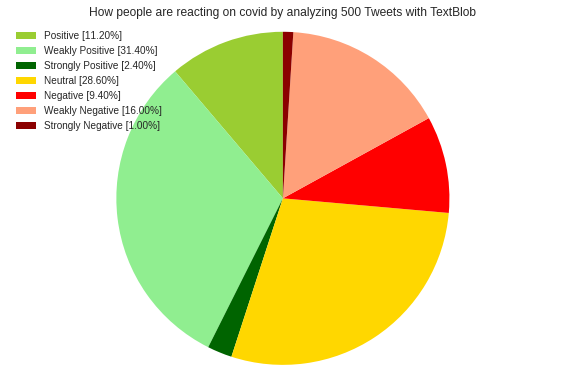

In [205]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_TextBlob, tool_name='TextBlob', keyword='covid')

#### NLTK - Vader Lexicon

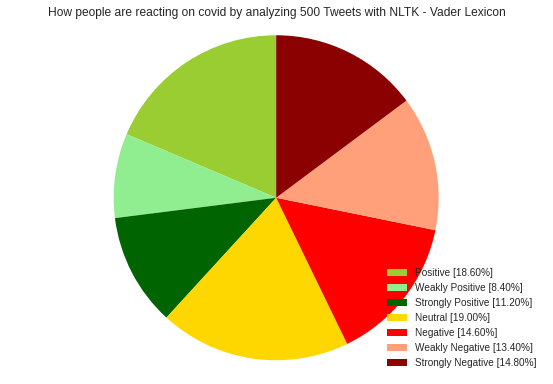

In [206]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_NLTK, tool_name='NLTK - Vader Lexicon', keyword='covid')

#### RNN

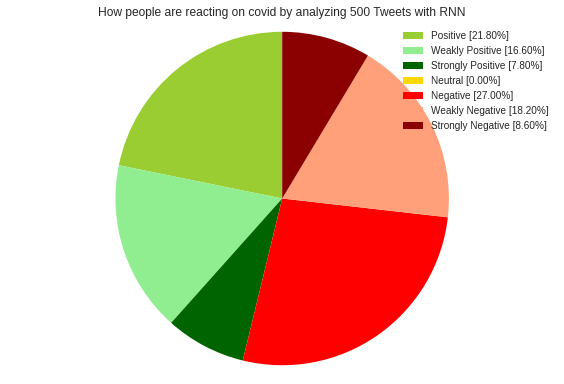

In [227]:
sentiment_result_label_category_counts_visualisazion(dataframe=twitter_dataframe_RNN, tool_name='RNN', keyword='covid')

# Neutral section can appears in some cases because of the 'None' values

#### BERT

In [ ]:
dataframe_size=len(twitter_dataframe_BERT)
print(dataframe_size)

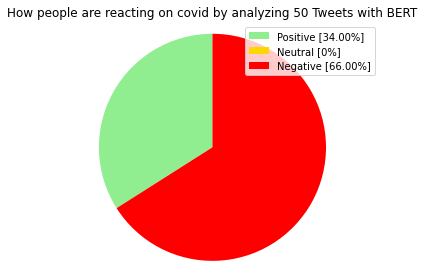

In [80]:
dataframe_sentiment_labels=list(twitter_dataframe_BERT["Sentiment"])
pos_num = ["pos" == label for label in dataframe_sentiment_labels].count(True)
neg_num = ["neg" == label for label in dataframe_sentiment_labels].count(True)

pos_percent = percentage(part=pos_num, whole=dataframe_size)
neg_percent = percentage(part=neg_num, whole=dataframe_size)

visualization_for_BERT(positive=pos_percent, neutral=0, negative=neg_percent, keyword='covid', limit=dataframe_size)

## Information Extraction

### Imports

In [ ]:
!pip install -U yellowbrick

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

In [255]:
from yellowbrick.text import PosTagVisualizer

import regex as re
import seaborn as sns
from collections import  Counter

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy import displacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
nlp = spacy.load('en_core_web_sm')
nlp

### Helper Methods

In [241]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

In [242]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

### TextBlob

In [45]:
# Dataframes only about the negative and positive tweets separately

positives_df_TextBlob = twitter_dataframe_TextBlob.loc[(twitter_dataframe_TextBlob['Sentiment'].str.contains("Positive", case=False))]

negativies_df_textblob = twitter_dataframe_TextBlob.loc[(twitter_dataframe_TextBlob['Sentiment'].str.contains("Negative", case=False))]

In [46]:
# Initializing a new dataframe with only the 'Tweet_text' column for faster operation

positive_tweet_text_df_TextBlob = positives_df_TextBlob['Tweet_text']
positive_tweet_text_df_TextBlob = positive_tweet_text_df_TextBlob.to_frame()

negative_tweet_text_df_TextBlob = negativies_df_textblob['Tweet_text']
negative_tweet_text_df_TextBlob = negative_tweet_text_df_TextBlob.to_frame()

In [47]:
positive_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text
12,Covid could be a warm project to what will com...
43,This is almost worth a complaint to the advert...
47,#MarjorieTheManiac #COVID19 In what way is #CO...
49,im going to be ia today bcs my roommate +ve co...
44,_M Also it’s 100000 times greater of getting t...
21,My patience with the anti-vaxxers and COVID de...
11,Omg gthey were there they just called everythi...
36,I mean they were able to make it to the 8 seed...
32,_vicki _ryan @_mamadeb _TMF _1 _hammer That's ...
28,There have been many reports that people with ...


In [48]:
negative_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text
7,COVID Alberta Thu Jul 22 2021 Update 106 New C...
3,And he can choose if he wants and his League s...
20,I will just point out that the severe side eff...
4,This is bleak...and we have way less than 50 p...
31,My fully vaccinated aunt was just sent to the ...
48,The lightning-fast quest for COVID vaccines an...
33,Just the same hot mess as usual Covid isn't th...
10,"CDC just reported 6,000 dead vaccinated people..."
6,Ask his mommie if he was always a big baby. A ...
13,I gotta say I’m really fucking tired of being ...


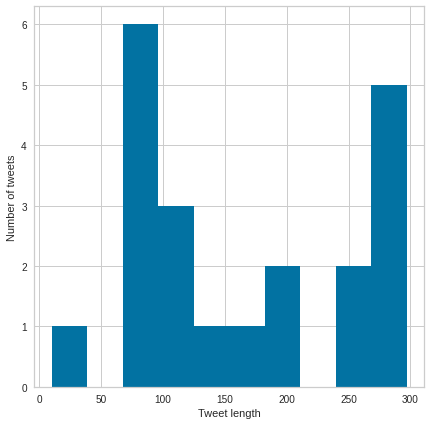

In [49]:
# Visualization of the 'Tweet_text' legth - positive

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

positive_tweet_text_df_TextBlob['Tweet_text'].str.len().hist()

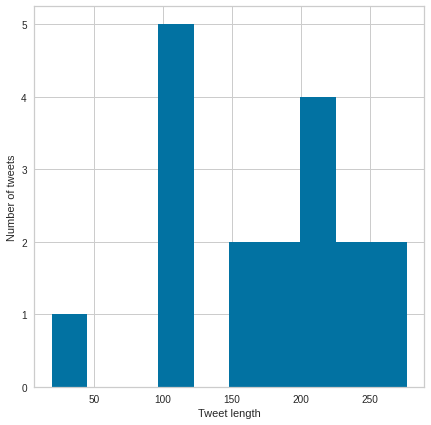

In [50]:
# Visualization of the 'Tweet_text' legth - negative

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

negative_tweet_text_df_TextBlob['Tweet_text'].str.len().hist()

#### Part of Speech Tagging


Regex explanation:

- [^] matches everything but everything inside the blockquotes
- \w matches any word character (equal to [a-zA-Z0-9_])
- \d matches a digit (equal to [0-9])
- \s matches any whitespace character (equal to [\r\n\t\f\v ])
- \' matches the character ' literally (case sensitive)
- '+' matches between one and unlimited times, as many times as possible, giving back as needed

In [51]:
# Noise Cleaning - spacing, special characters, lowercasing

positive_tweet_text_df_TextBlob['Tweet_text'] = positive_tweet_text_df_TextBlob['Tweet_text'].str.lower()
positive_tweet_text_df_TextBlob['Tweet_text'] = positive_tweet_text_df_TextBlob['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

negative_tweet_text_df_TextBlob['Tweet_text'] = negative_tweet_text_df_TextBlob['Tweet_text'].str.lower()
negative_tweet_text_df_TextBlob['Tweet_text'] = negative_tweet_text_df_TextBlob['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))


In [52]:
positive_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text
12,covid could be a warm project to what will com...
43,this is almost worth a complaint to the advert...
47,marjoriethemaniac covid19 in what way is covid...
49,im going to be ia today bcs my roommate ve cov...
44,_m also its 100000 times greater of getting th...
21,my patience with the antivaxxers and covid den...
11,omg gthey were there they just called everythi...
36,i mean they were able to make it to the 8 seed...
32,_vicki _ryan _mamadeb _tmf _1 _hammer that's p...
28,there have been many reports that people with ...


In [53]:
negative_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text
7,covid alberta thu jul 22 2021 update 106 new c...
3,and he can choose if he wants and his league s...
20,i will just point out that the severe side eff...
4,this is bleakand we have way less than 50 perc...
31,my fully vaccinated aunt was just sent to the ...
48,the lightningfast quest for covid vaccines and...
33,just the same hot mess as usual covid isn't th...
10,cdc just reported 6000 dead vaccinated people ...
6,ask his mommie if he was always a big baby a m...
13,i gotta say im really fucking tired of being e...


In [54]:
# NLTK tokenization

positive_tweet_text_df_TextBlob['tokenized_Tweet_text'] = positive_tweet_text_df_TextBlob['Tweet_text'].apply(word_tokenize)

negative_tweet_text_df_TextBlob['tokenized_Tweet_text'] = negative_tweet_text_df_TextBlob['Tweet_text'].apply(word_tokenize)

In [55]:
positive_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
12,covid could be a warm project to what will com...,"[covid, could, be, a, warm, project, to, what,..."
43,this is almost worth a complaint to the advert...,"[this, is, almost, worth, a, complaint, to, th..."
47,marjoriethemaniac covid19 in what way is covid...,"[marjoriethemaniac, covid19, in, what, way, is..."
49,im going to be ia today bcs my roommate ve cov...,"[im, going, to, be, ia, today, bcs, my, roomma..."
44,_m also its 100000 times greater of getting th...,"[_m, also, its, 100000, times, greater, of, ge..."
21,my patience with the antivaxxers and covid den...,"[my, patience, with, the, antivaxxers, and, co..."
11,omg gthey were there they just called everythi...,"[omg, gthey, were, there, they, just, called, ..."
36,i mean they were able to make it to the 8 seed...,"[i, mean, they, were, able, to, make, it, to, ..."
32,_vicki _ryan _mamadeb _tmf _1 _hammer that's p...,"[_vicki, _ryan, _mamadeb, _tmf, _1, _hammer, t..."
28,there have been many reports that people with ...,"[there, have, been, many, reports, that, peopl..."


In [56]:
negative_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
7,covid alberta thu jul 22 2021 update 106 new c...,"[covid, alberta, thu, jul, 22, 2021, update, 1..."
3,and he can choose if he wants and his league s...,"[and, he, can, choose, if, he, wants, and, his..."
20,i will just point out that the severe side eff...,"[i, will, just, point, out, that, the, severe,..."
4,this is bleakand we have way less than 50 perc...,"[this, is, bleakand, we, have, way, less, than..."
31,my fully vaccinated aunt was just sent to the ...,"[my, fully, vaccinated, aunt, was, just, sent,..."
48,the lightningfast quest for covid vaccines and...,"[the, lightningfast, quest, for, covid, vaccin..."
33,just the same hot mess as usual covid isn't th...,"[just, the, same, hot, mess, as, usual, covid,..."
10,cdc just reported 6000 dead vaccinated people ...,"[cdc, just, reported, 6000, dead, vaccinated, ..."
6,ask his mommie if he was always a big baby a m...,"[ask, his, mommie, if, he, was, always, a, big..."
13,i gotta say im really fucking tired of being e...,"[i, got, ta, say, im, really, fucking, tired, ..."


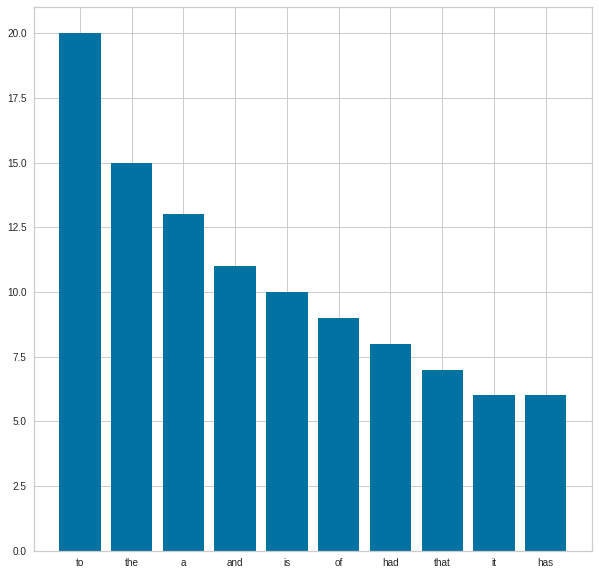

In [57]:
# Top Stopwords - Positive tweets

plot_top_stopwords_barchart(positive_tweet_text_df_TextBlob['Tweet_text'])

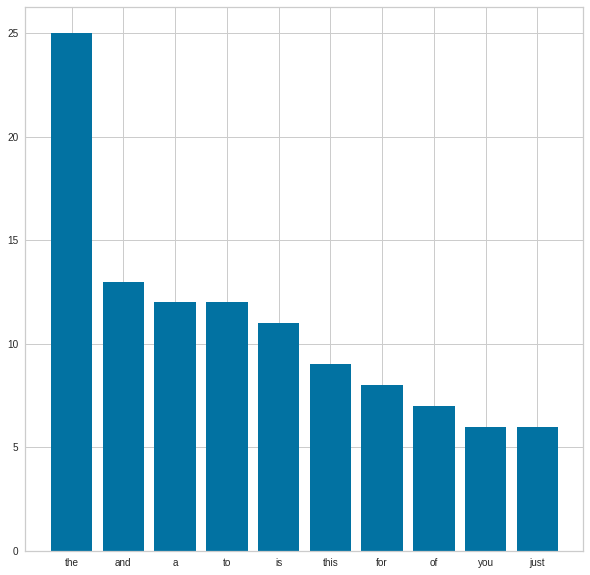

In [58]:
# Top Stopwords - Nagative tweets

plot_top_stopwords_barchart(negative_tweet_text_df_TextBlob['Tweet_text'])

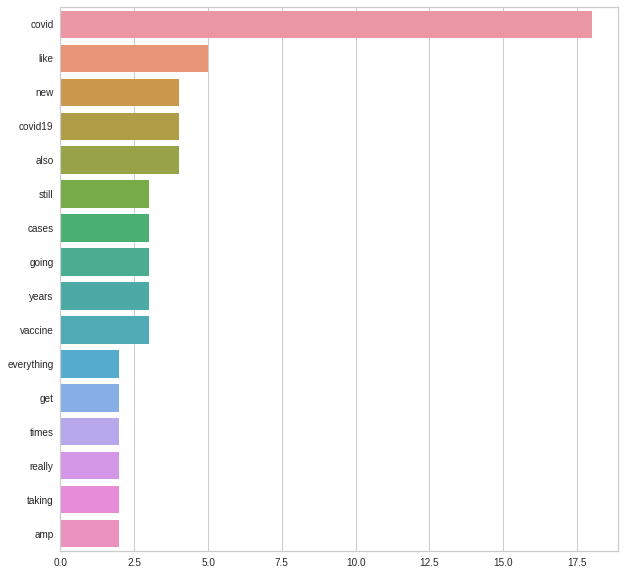

In [59]:
# Top NON Stopwords - Positive tweets

plot_top_non_stopwords_barchart(positive_tweet_text_df_TextBlob['Tweet_text'])

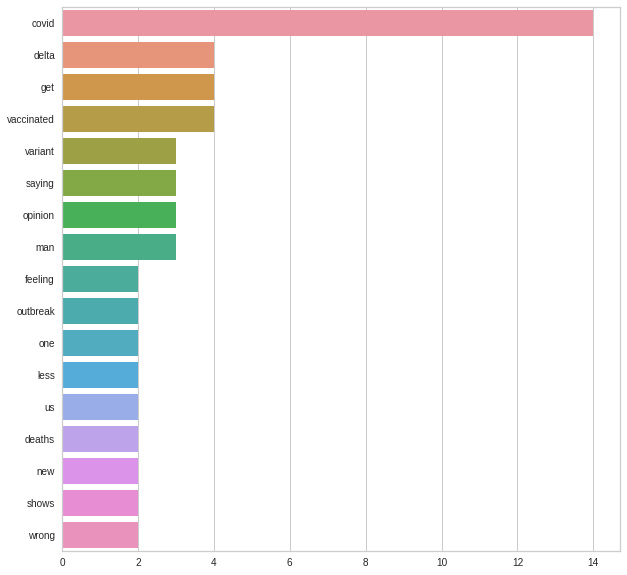

In [60]:
# Top NON Stopwords - Negative tweets

plot_top_non_stopwords_barchart(negative_tweet_text_df_TextBlob['Tweet_text'])

In [61]:
# Removing stopwords

positive_tweet_text_df_TextBlob['tokenized_Tweet_text'] = positive_tweet_text_df_TextBlob['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
positive_tweet_text_df_TextBlob['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in positive_tweet_text_df_TextBlob['tokenized_Tweet_text']]

negative_tweet_text_df_TextBlob['tokenized_Tweet_text'] = negative_tweet_text_df_TextBlob['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
negative_tweet_text_df_TextBlob['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in negative_tweet_text_df_TextBlob['tokenized_Tweet_text']]

In [62]:
positive_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
12,covid could be a warm project to what will com...,"[covid, could, warm, project, come, 'for, real...",covid could warm project come 'for real ' time...
43,this is almost worth a complaint to the advert...,"[almost, worth, complaint, advertising, standa...",almost worth complaint advertising standards a...
47,marjoriethemaniac covid19 in what way is covid...,"[marjoriethemaniac, covid19, way, covid, funny...",marjoriethemaniac covid19 way covid funny http...
49,im going to be ia today bcs my roommate ve cov...,"[im, going, ia, today, bcs, roommate, covid, g...",im going ia today bcs roommate covid gon na lo...
44,_m also its 100000 times greater of getting th...,"[_m, also, 100000, times, greater, getting, ex...",_m also 100000 times greater getting exact thi...
21,my patience with the antivaxxers and covid den...,"[patience, antivaxxers, covid, deniers, comple...",patience antivaxxers covid deniers completely ...
11,omg gthey were there they just called everythi...,"[omg, gthey, called, everything, covid, get, f...",omg gthey called everything covid get fed real
36,i mean they were able to make it to the 8 seed...,"[mean, able, make, 8, seed, despite, major, ro...",mean able make 8 seed despite major role playe...
32,_vicki _ryan _mamadeb _tmf _1 _hammer that's p...,"[_vicki, _ryan, _mamadeb, _tmf, _1, _hammer, '...",_vicki _ryan _mamadeb _tmf _1 _hammer 's parti...
28,there have been many reports that people with ...,"[many, reports, people, long, haul, covid, les...",many reports people long haul covid lessening ...


In [63]:
negative_tweet_text_df_TextBlob.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
7,covid alberta thu jul 22 2021 update 106 new c...,"[covid, alberta, thu, jul, 22, 2021, update, 1...",covid alberta thu jul 22 2021 update 106 new c...
3,and he can choose if he wants and his league s...,"[choose, wants, league, say, 's, game, resched...",choose wants league say 's game rescheduled wi...
20,i will just point out that the severe side eff...,"[point, severe, side, effects, vaccine, much, ...",point severe side effects vaccine much less li...
4,this is bleakand we have way less than 50 perc...,"[bleakand, way, less, 50, percent, vaccination...",bleakand way less 50 percent vaccination rate ...
31,my fully vaccinated aunt was just sent to the ...,"[fully, vaccinated, aunt, sent, hospital, test...",fully vaccinated aunt sent hospital testing po...
48,the lightningfast quest for covid vaccines and...,"[lightningfast, quest, covid, vaccines, means,...",lightningfast quest covid vaccines means disea...
33,just the same hot mess as usual covid isn't th...,"[hot, mess, usual, covid, n't, bad, everything...",hot mess usual covid n't bad everything commun...
10,cdc just reported 6000 dead vaccinated people ...,"[cdc, reported, 6000, dead, vaccinated, people...",cdc reported 6000 dead vaccinated people came ...
6,ask his mommie if he was always a big baby a m...,"[ask, mommie, always, big, baby, man, hospital...",ask mommie always big baby man hospitalized co...
13,i gotta say im really fucking tired of being e...,"[got, ta, say, im, really, fucking, tired, exp...",got ta say im really fucking tired expected mo...


In [64]:
positive_tagged_stanzas = []
positive_tagged = []

for word in positive_tweet_text_df_TextBlob['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  positive_tagged_stanzas.append(tagged_word)

positive_tagged.append(positive_tagged_stanzas)

In [65]:
negative_tagged_stanzas = []
negative_tagged = []

for word in negative_tweet_text_df_TextBlob['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  negative_tagged_stanzas.append(tagged_word)

negative_tagged.append(negative_tagged_stanzas)

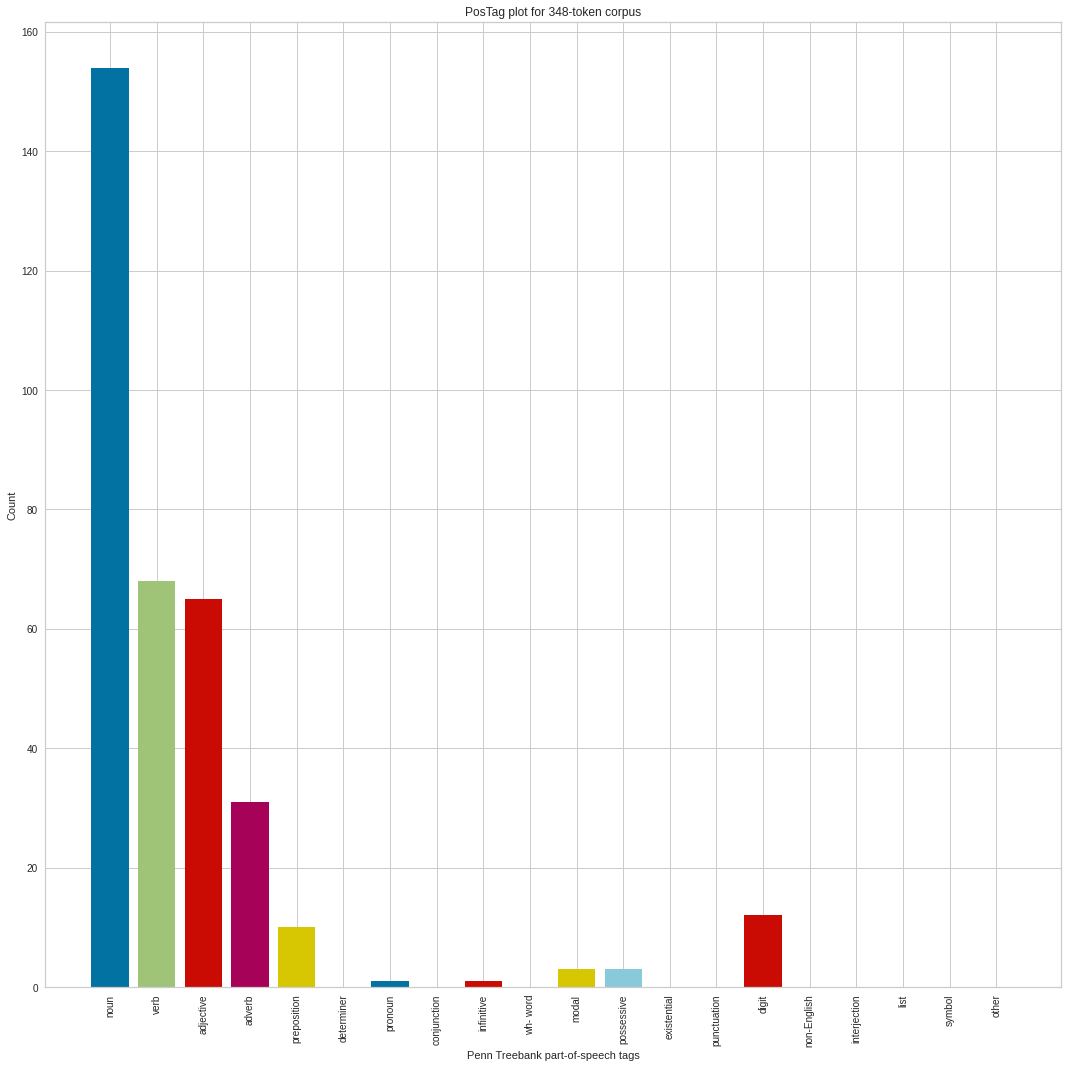

In [66]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(positive_tagged)
viz.show()

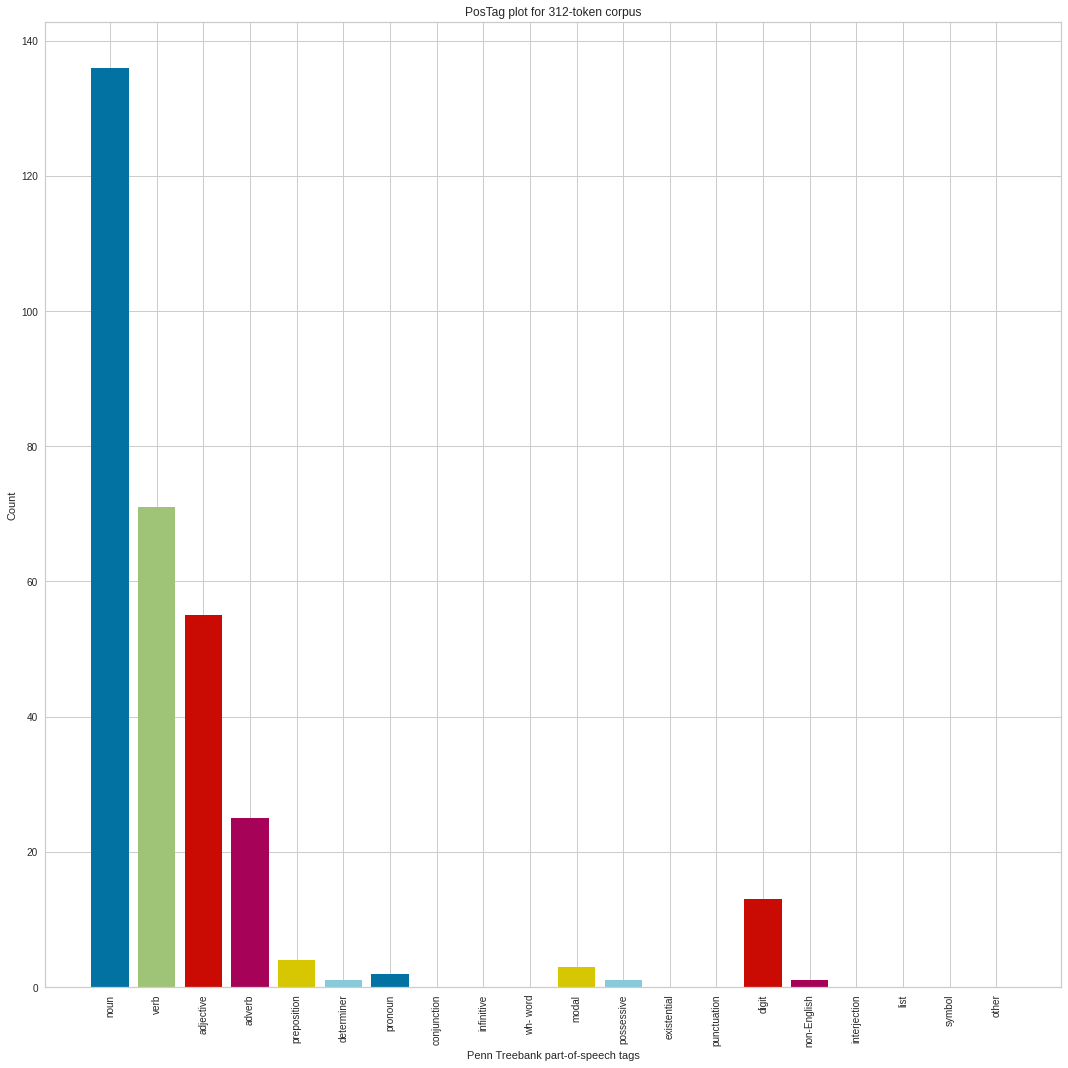

In [67]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(negative_tagged)
viz.show()

#### Dependency Parsing

In [68]:
# Most followed user tweet analysis  Followers_count

most_followed_positive = positives_df_TextBlob[positives_df_TextBlob['Followers_count']== positives_df_TextBlob['Followers_count'].max()]

most_followed_negative = negativies_df_textblob[negativies_df_textblob['Followers_count']== negativies_df_textblob['Followers_count'].max()]

In [69]:
most_followed_positive

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
25,2021-07-22 23:59:50,KamThisWeek,B.C reports 89 new cases of COVID-19 with 37 i...,[],11451,0.136364,weakly_positive,TextBlob


In [70]:
most_followed_negative

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
48,2021-07-22 23:59:43,Cleavon_MD,The lightning-fast quest for COVID vaccines an...,[],156491,-0.125,weakly_negative,TextBlob


In [71]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_positive['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  B.C reports 89 new cases of COVID-19 with 37 in Interior Health https://t.co/5MJEKqNk73 https://t.co/U209XxdzxD


In [72]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_negative['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  The lightning-fast quest for COVID vaccines and what it means for other diseases https://t.co/jkLupy6HWC


### NLTK - Vader Lexicon

In [142]:
# Dataframes only about the negative and positive tweets separately

positives_df_NLTK = twitter_dataframe_NLTK.loc[(twitter_dataframe_NLTK['Sentiment'].str.contains("Positive", case=False))]

negativies_df_NLTK = twitter_dataframe_NLTK.loc[(twitter_dataframe_NLTK['Sentiment'].str.contains("Negative", case=False))]

In [143]:
# Initializing a new dataframe with only the 'Tweet_text' column for faster operation

positive_tweet_text_df_NLTK = positives_df_NLTK['Tweet_text']
positive_tweet_text_df_NLTK = positive_tweet_text_df_NLTK.to_frame()

negative_tweet_text_df_NLTK = negativies_df_NLTK['Tweet_text']
negative_tweet_text_df_NLTK = negative_tweet_text_df_NLTK.to_frame()

In [75]:
positive_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text
38,U.S is seeing a new wave of COVID-19 cases but it won't be like the last wave Thanks vaccine https://t.co/x7IXMSOREZ
5,Saying chocolate is better than vanilla is an opinion. Saying covid was proven to have been man made is not an opinion It’s factually wrong. Do you honestly not know the difference between opinion and fact?
36,I mean they were able to make it to the 8 seed despite major role players like Bryant and Deni being hurt and extend missed time for players like Rui and Beal along with a major COVID outbreak And yeah Scott Brooks through all that was an awful coach as always lol
34,I am not taking a Covid 19 vaccine all why would I take an experiment vaccine and it’s not FDA approved tf I look like
40,_Finnegan Sorry to https://t.co/w6llaplfsQ mum has it since she had me(42)she’s 75 She also has pulmonary fibrosis She had a hemothorax ‘19 &amp only then was given oxygen unlike what docs had thought years b4 She also had Covid Mar ‘20 it’s good to hear those stories so keep the faith
47,#MarjorieTheManiac #COVID19 In what way is #COVID funny https://t.co/QxOJ1oE8MW
28,There have been many reports that people with long haul Covid had lessening of symptoms after vaccination There are controlled studies now investigating this If shown true seems likely that vaccinated would also be less likely to get long haul syndrome or milder forms of it
24,TGA Australia Publication date TODAY Provisional approval for use of the Pfizer BNT162b2 COVID-19 vaccine (COMIRNATY in the 12-15 years age group 😳👇👇 https://t.co/MwDiybKKKq
16,_nnul Covid amor :/
1,_fromSJ Yes it does https://t.co/cJK45fJG2n


In [76]:
negative_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text
8,I understand this is frustrating No one likes.Covid But getting angry at health officials is the wrong response.
6,Ask his mommie if he was always a big baby. A man hospitalized with COVID-19 told CBS he'd still rather be sick than get a shot and it shows how hard it'll be to convince everyone to get vaccinated https://t.co/yyUBht5b4H
32,_vicki _ryan @_mamadeb _TMF _1 _hammer That's particularly tricky and I'm not going to address that one because I don't know I'm taking into account that COVID-19 has it's building blocks based on influenza Still last I checked you don't need to flu vaccine twice a year though which was my point.
31,My fully vaccinated aunt was just sent to the hospital after testing positive for covid A giant FUCK YOU to Biden and team for acting like this shit isn’t happening!
14,Covid is a war we need to fight back https://t.co/bb0w0gE1aL
35,Do you ever get the feeling that with this COVID pandemic and now the mutated delta variant that maybe our planet doesn't fucking want us anymore? We've had too many late night patties been late with rent too often we getting kicked the FUCK out.
46,Marjorie Taylor Greene SUSPENDED from Twitter for #COVID Misinformation https://t.co/dOhrfKD11c via
42,So I pull into a McDonalds in Bofuck IA No counter help Just kiosks This is the future and McD’s answer to the $15 an hour outcry Also woman walks in coughs No mask No attempt to cover the cough Just coughs I can only assume news of COVID never reached Bofuck IA.
18,I’ve officially had my first COVID jab No dramas Just waiting for the requisite 20 mins now.
13,I gotta say I’m really fucking tired of being expected to have all this moral outrage on behalf of restaurant owners when ppl are dying from COVID climate change etc https://t.co/x7Fyi73pab


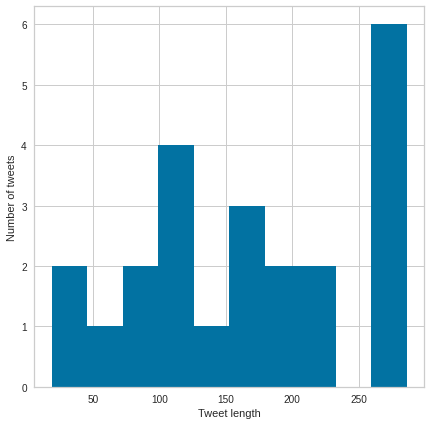

In [77]:
# Visualization of the 'Tweet_text' legth - positive

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

positive_tweet_text_df_NLTK['Tweet_text'].str.len().hist()

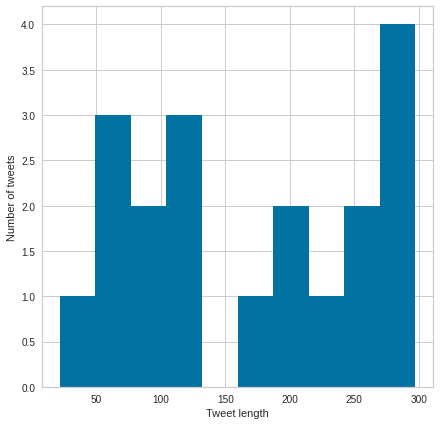

In [78]:
# Visualization of the 'Tweet_text' legth - negative

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

negative_tweet_text_df_NLTK['Tweet_text'].str.len().hist()

#### Part of Speech Tagging

In [79]:
# Noise Cleaning - spacing, special characters, lowercasing

positive_tweet_text_df_NLTK['Tweet_text'] = positive_tweet_text_df_NLTK['Tweet_text'].str.lower()
positive_tweet_text_df_NLTK['Tweet_text'] = positive_tweet_text_df_NLTK['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

negative_tweet_text_df_NLTK['Tweet_text'] = negative_tweet_text_df_NLTK['Tweet_text'].str.lower()
negative_tweet_text_df_NLTK['Tweet_text'] = negative_tweet_text_df_NLTK['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

In [80]:
positive_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text
38,us is seeing a new wave of covid19 cases but it won't be like the last wave thanks vaccine httpstcox7ixmsorez
5,saying chocolate is better than vanilla is an opinion saying covid was proven to have been man made is not an opinion its factually wrong do you honestly not know the difference between opinion and fact
36,i mean they were able to make it to the 8 seed despite major role players like bryant and deni being hurt and extend missed time for players like rui and beal along with a major covid outbreak and yeah scott brooks through all that was an awful coach as always lol
34,i am not taking a covid 19 vaccine all why would i take an experiment vaccine and its not fda approved tf i look like
40,_finnegan sorry to httpstcow6llaplfsq mum has it since she had me42shes 75 she also has pulmonary fibrosis she had a hemothorax 19 amp only then was given oxygen unlike what docs had thought years b4 she also had covid mar 20 its good to hear those stories so keep the faith
47,marjoriethemaniac covid19 in what way is covid funny httpstcoqxoj1oe8mw
28,there have been many reports that people with long haul covid had lessening of symptoms after vaccination there are controlled studies now investigating this if shown true seems likely that vaccinated would also be less likely to get long haul syndrome or milder forms of it
24,tga australia publication date today provisional approval for use of the pfizer bnt162b2 covid19 vaccine comirnaty in the 1215 years age group httpstcomwdiybkkkq
16,_nnul covid amor
1,_fromsj yes it does httpstcocjk45fjg2n


In [81]:
negative_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text
8,i understand this is frustrating no one likescovid but getting angry at health officials is the wrong response
6,ask his mommie if he was always a big baby a man hospitalized with covid19 told cbs he'd still rather be sick than get a shot and it shows how hard it'll be to convince everyone to get vaccinated httpstcoyyubht5b4h
32,_vicki _ryan _mamadeb _tmf _1 _hammer that's particularly tricky and i'm not going to address that one because i don't know i'm taking into account that covid19 has it's building blocks based on influenza still last i checked you don't need to flu vaccine twice a year though which was my point
31,my fully vaccinated aunt was just sent to the hospital after testing positive for covid a giant fuck you to biden and team for acting like this shit isnt happening
14,covid is a war we need to fight back httpstcobb0w0ge1al
35,do you ever get the feeling that with this covid pandemic and now the mutated delta variant that maybe our planet doesn't fucking want us anymore we've had too many late night patties been late with rent too often we getting kicked the fuck out
46,marjorie taylor greene suspended from twitter for covid misinformation httpstcodohrfkd11c via
42,so i pull into a mcdonalds in bofuck ia no counter help just kiosks this is the future and mcds answer to the 15 an hour outcry also woman walks in coughs no mask no attempt to cover the cough just coughs i can only assume news of covid never reached bofuck ia
18,ive officially had my first covid jab no dramas just waiting for the requisite 20 mins now
13,i gotta say im really fucking tired of being expected to have all this moral outrage on behalf of restaurant owners when ppl are dying from covid climate change etc httpstcox7fyi73pab


In [82]:
# NLTK tokenization

positive_tweet_text_df_NLTK['tokenized_Tweet_text'] = positive_tweet_text_df_NLTK['Tweet_text'].apply(word_tokenize)

negative_tweet_text_df_NLTK['tokenized_Tweet_text'] = negative_tweet_text_df_NLTK['Tweet_text'].apply(word_tokenize)

In [83]:
positive_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
38,us is seeing a new wave of covid19 cases but it won't be like the last wave thanks vaccine httpstcox7ixmsorez,"[us, is, seeing, a, new, wave, of, covid19, cases, but, it, wo, n't, be, like, the, last, wave, thanks, vaccine, httpstcox7ixmsorez]"
5,saying chocolate is better than vanilla is an opinion saying covid was proven to have been man made is not an opinion its factually wrong do you honestly not know the difference between opinion and fact,"[saying, chocolate, is, better, than, vanilla, is, an, opinion, saying, covid, was, proven, to, have, been, man, made, is, not, an, opinion, its, factually, wrong, do, you, honestly, not, know, the, difference, between, opinion, and, fact]"
36,i mean they were able to make it to the 8 seed despite major role players like bryant and deni being hurt and extend missed time for players like rui and beal along with a major covid outbreak and yeah scott brooks through all that was an awful coach as always lol,"[i, mean, they, were, able, to, make, it, to, the, 8, seed, despite, major, role, players, like, bryant, and, deni, being, hurt, and, extend, missed, time, for, players, like, rui, and, beal, along, with, a, major, covid, outbreak, and, yeah, scott, brooks, through, all, that, was, an, awful, coach, as, always, lol]"
34,i am not taking a covid 19 vaccine all why would i take an experiment vaccine and its not fda approved tf i look like,"[i, am, not, taking, a, covid, 19, vaccine, all, why, would, i, take, an, experiment, vaccine, and, its, not, fda, approved, tf, i, look, like]"
40,_finnegan sorry to httpstcow6llaplfsq mum has it since she had me42shes 75 she also has pulmonary fibrosis she had a hemothorax 19 amp only then was given oxygen unlike what docs had thought years b4 she also had covid mar 20 its good to hear those stories so keep the faith,"[_finnegan, sorry, to, httpstcow6llaplfsq, mum, has, it, since, she, had, me42shes, 75, she, also, has, pulmonary, fibrosis, she, had, a, hemothorax, 19, amp, only, then, was, given, oxygen, unlike, what, docs, had, thought, years, b4, she, also, had, covid, mar, 20, its, good, to, hear, those, stories, so, keep, the, faith]"
47,marjoriethemaniac covid19 in what way is covid funny httpstcoqxoj1oe8mw,"[marjoriethemaniac, covid19, in, what, way, is, covid, funny, httpstcoqxoj1oe8mw]"
28,there have been many reports that people with long haul covid had lessening of symptoms after vaccination there are controlled studies now investigating this if shown true seems likely that vaccinated would also be less likely to get long haul syndrome or milder forms of it,"[there, have, been, many, reports, that, people, with, long, haul, covid, had, lessening, of, symptoms, after, vaccination, there, are, controlled, studies, now, investigating, this, if, shown, true, seems, likely, that, vaccinated, would, also, be, less, likely, to, get, long, haul, syndrome, or, milder, forms, of, it]"
24,tga australia publication date today provisional approval for use of the pfizer bnt162b2 covid19 vaccine comirnaty in the 1215 years age group httpstcomwdiybkkkq,"[tga, australia, publication, date, today, provisional, approval, for, use, of, the, pfizer, bnt162b2, covid19, vaccine, comirnaty, in, the, 1215, years, age, group, httpstcomwdiybkkkq]"
16,_nnul covid amor,"[_nnul, covid, amor]"
1,_fromsj yes it does httpstcocjk45fjg2n,"[_fromsj, yes, it, does, httpstcocjk45fjg2n]"


In [84]:
negative_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
8,i understand this is frustrating no one likescovid but getting angry at health officials is the wrong response,"[i, understand, this, is, frustrating, no, one, likescovid, but, getting, angry, at, health, officials, is, the, wrong, response]"
6,ask his mommie if he was always a big baby a man hospitalized with covid19 told cbs he'd still rather be sick than get a shot and it shows how hard it'll be to convince everyone to get vaccinated httpstcoyyubht5b4h,"[ask, his, mommie, if, he, was, always, a, big, baby, a, man, hospitalized, with, covid19, told, cbs, he, 'd, still, rather, be, sick, than, get, a, shot, and, it, shows, how, hard, it, 'll, be, to, convince, everyone, to, get, vaccinated, httpstcoyyubht5b4h]"
32,_vicki _ryan _mamadeb _tmf _1 _hammer that's particularly tricky and i'm not going to address that one because i don't know i'm taking into account that covid19 has it's building blocks based on influenza still last i checked you don't need to flu vaccine twice a year though which was my point,"[_vicki, _ryan, _mamadeb, _tmf, _1, _hammer, that, 's, particularly, tricky, and, i, 'm, not, going, to, address, that, one, because, i, do, n't, know, i, 'm, taking, into, account, that, covid19, has, it, 's, building, blocks, based, on, influenza, still, last, i, checked, you, do, n't, need, to, flu, vaccine, twice, a, year, though, which, was, my, point]"
31,my fully vaccinated aunt was just sent to the hospital after testing positive for covid a giant fuck you to biden and team for acting like this shit isnt happening,"[my, fully, vaccinated, aunt, was, just, sent, to, the, hospital, after, testing, positive, for, covid, a, giant, fuck, you, to, biden, and, team, for, acting, like, this, shit, isnt, happening]"
14,covid is a war we need to fight back httpstcobb0w0ge1al,"[covid, is, a, war, we, need, to, fight, back, httpstcobb0w0ge1al]"
35,do you ever get the feeling that with this covid pandemic and now the mutated delta variant that maybe our planet doesn't fucking want us anymore we've had too many late night patties been late with rent too often we getting kicked the fuck out,"[do, you, ever, get, the, feeling, that, with, this, covid, pandemic, and, now, the, mutated, delta, variant, that, maybe, our, planet, does, n't, fucking, want, us, anymore, we, 've, had, too, many, late, night, patties, been, late, with, rent, too, often, we, getting, kicked, the, fuck, out]"
46,marjorie taylor greene suspended from twitter for covid misinformation httpstcodohrfkd11c via,"[marjorie, taylor, greene, suspended, from, twitter, for, covid, misinformation, httpstcodohrfkd11c, via]"
42,so i pull into a mcdonalds in bofuck ia no counter help just kiosks this is the future and mcds answer to the 15 an hour outcry also woman walks in coughs no mask no attempt to cover the cough just coughs i can only assume news of covid never reached bofuck ia,"[so, i, pull, into, a, mcdonalds, in, bofuck, ia, no, counter, help, just, kiosks, this, is, the, future, and, mcds, answer, to, the, 15, an, hour, outcry, also, woman, walks, in, coughs, no, mask, no, attempt, to, cover, the, cough, just, coughs, i, can, only, assume, news, of, covid, never, reached, bofuck, ia]"
18,ive officially had my first covid jab no dramas just waiting for the requisite 20 mins now,"[ive, officially, had, my, first, covid, jab, no, dramas, just, waiting, for, the, requisite, 20, mins, now]"
13,i gotta say im really fucking tired of being expected to have all this moral outrage on behalf of restaurant owners when ppl are dying from covid climate change etc httpstcox7fyi73pab,"[i, got, ta, say, im, really, fucking, tired, of, being, expected, to, have, all, this, moral, outrage, on, behalf, of, restaurant, owners, when, ppl, are, dying, from, covid, climate, change, etc, httpstcox7fyi73pab]"


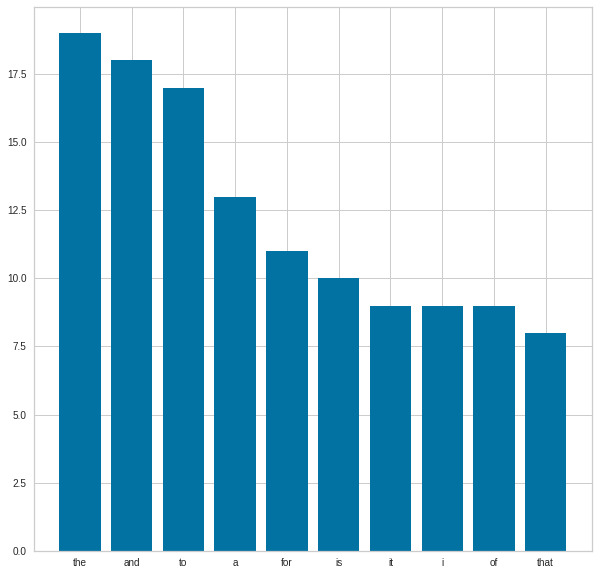

In [85]:
# Top Stopwords - Positive tweets

plot_top_stopwords_barchart(positive_tweet_text_df_NLTK['Tweet_text'])

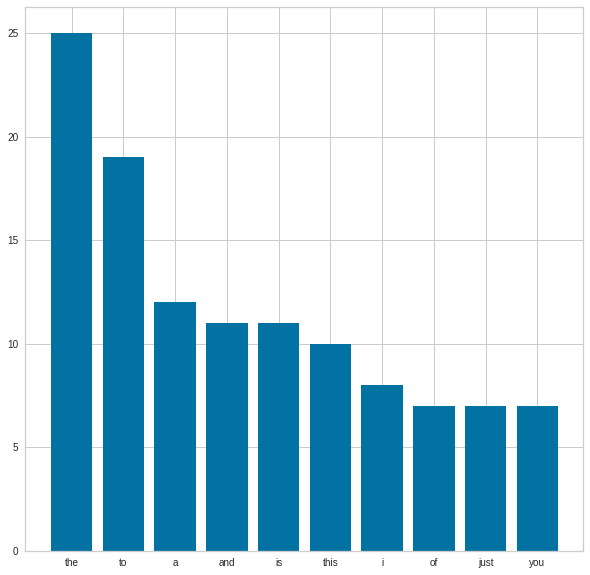

In [86]:
# Top Stopwords - Nagative tweets

plot_top_stopwords_barchart(negative_tweet_text_df_NLTK['Tweet_text'])

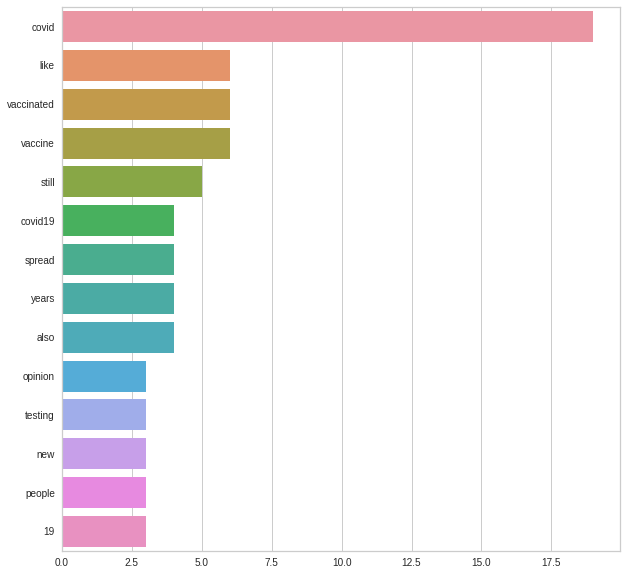

In [87]:
# Top NON Stopwords - Positive tweets

plot_top_non_stopwords_barchart(positive_tweet_text_df_NLTK['Tweet_text'])

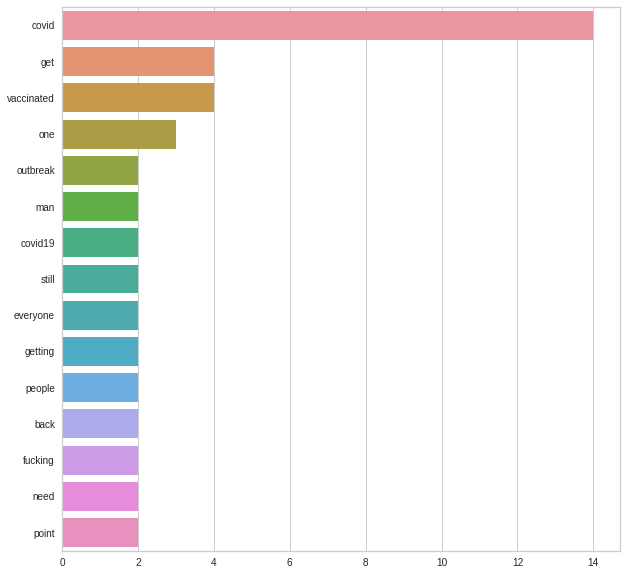

In [88]:
# Top NON Stopwords - Negative tweets

plot_top_non_stopwords_barchart(negative_tweet_text_df_NLTK['Tweet_text'])

In [89]:
# Removing stopwords

positive_tweet_text_df_NLTK['tokenized_Tweet_text'] = positive_tweet_text_df_NLTK['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
positive_tweet_text_df_NLTK['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in positive_tweet_text_df_NLTK['tokenized_Tweet_text']]

negative_tweet_text_df_NLTK['tokenized_Tweet_text'] = negative_tweet_text_df_NLTK['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
negative_tweet_text_df_NLTK['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in negative_tweet_text_df_NLTK['tokenized_Tweet_text']]

In [90]:
positive_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
38,us is seeing a new wave of covid19 cases but it won't be like the last wave thanks vaccine httpstcox7ixmsorez,"[us, seeing, new, wave, covid19, cases, wo, n't, like, last, wave, thanks, vaccine, httpstcox7ixmsorez]",us seeing new wave covid19 cases wo n't like last wave thanks vaccine httpstcox7ixmsorez
5,saying chocolate is better than vanilla is an opinion saying covid was proven to have been man made is not an opinion its factually wrong do you honestly not know the difference between opinion and fact,"[saying, chocolate, better, vanilla, opinion, saying, covid, proven, man, made, opinion, factually, wrong, honestly, know, difference, opinion, fact]",saying chocolate better vanilla opinion saying covid proven man made opinion factually wrong honestly know difference opinion fact
36,i mean they were able to make it to the 8 seed despite major role players like bryant and deni being hurt and extend missed time for players like rui and beal along with a major covid outbreak and yeah scott brooks through all that was an awful coach as always lol,"[mean, able, make, 8, seed, despite, major, role, players, like, bryant, deni, hurt, extend, missed, time, players, like, rui, beal, along, major, covid, outbreak, yeah, scott, brooks, awful, coach, always, lol]",mean able make 8 seed despite major role players like bryant deni hurt extend missed time players like rui beal along major covid outbreak yeah scott brooks awful coach always lol
34,i am not taking a covid 19 vaccine all why would i take an experiment vaccine and its not fda approved tf i look like,"[taking, covid, 19, vaccine, would, take, experiment, vaccine, fda, approved, tf, look, like]",taking covid 19 vaccine would take experiment vaccine fda approved tf look like
40,_finnegan sorry to httpstcow6llaplfsq mum has it since she had me42shes 75 she also has pulmonary fibrosis she had a hemothorax 19 amp only then was given oxygen unlike what docs had thought years b4 she also had covid mar 20 its good to hear those stories so keep the faith,"[_finnegan, sorry, httpstcow6llaplfsq, mum, since, me42shes, 75, also, pulmonary, fibrosis, hemothorax, 19, amp, given, oxygen, unlike, docs, thought, years, b4, also, covid, mar, 20, good, hear, stories, keep, faith]",_finnegan sorry httpstcow6llaplfsq mum since me42shes 75 also pulmonary fibrosis hemothorax 19 amp given oxygen unlike docs thought years b4 also covid mar 20 good hear stories keep faith
47,marjoriethemaniac covid19 in what way is covid funny httpstcoqxoj1oe8mw,"[marjoriethemaniac, covid19, way, covid, funny, httpstcoqxoj1oe8mw]",marjoriethemaniac covid19 way covid funny httpstcoqxoj1oe8mw
28,there have been many reports that people with long haul covid had lessening of symptoms after vaccination there are controlled studies now investigating this if shown true seems likely that vaccinated would also be less likely to get long haul syndrome or milder forms of it,"[many, reports, people, long, haul, covid, lessening, symptoms, vaccination, controlled, studies, investigating, shown, true, seems, likely, vaccinated, would, also, less, likely, get, long, haul, syndrome, milder, forms]",many reports people long haul covid lessening symptoms vaccination controlled studies investigating shown true seems likely vaccinated would also less likely get long haul syndrome milder forms
24,tga australia publication date today provisional approval for use of the pfizer bnt162b2 covid19 vaccine comirnaty in the 1215 years age group httpstcomwdiybkkkq,"[tga, australia, publication, date, today, provisional, approval, use, pfizer, bnt162b2, covid19, vaccine, comirnaty, 1215, years, age, group, httpstcomwdiybkkkq]",tga australia publication date today provisional approval use pfizer bnt162b2 covid19 vaccine comirnaty 1215 years age group httpstcomwdiybkkkq
16,_nnul covid amor,"[_nnul, covid, amor]",_nnul covid amor
1,_fromsj yes it does httpstcocjk45fjg2n,"[_fromsj, yes, httpstc

In [91]:
negative_tweet_text_df_NLTK.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
8,i understand this is frustrating no one likescovid but getting angry at health officials is the wrong response,"[understand, frustrating, one, likescovid, getting, angry, health, officials, wrong, response]",understand frustrating one likescovid getting angry health officials wrong response
6,ask his mommie if he was always a big baby a man hospitalized with covid19 told cbs he'd still rather be sick than get a shot and it shows how hard it'll be to convince everyone to get vaccinated httpstcoyyubht5b4h,"[ask, mommie, always, big, baby, man, hospitalized, covid19, told, cbs, 'd, still, rather, sick, get, shot, shows, hard, 'll, convince, everyone, get, vaccinated, httpstcoyyubht5b4h]",ask mommie always big baby man hospitalized covid19 told cbs 'd still rather sick get shot shows hard 'll convince everyone get vaccinated httpstcoyyubht5b4h
32,_vicki _ryan _mamadeb _tmf _1 _hammer that's particularly tricky and i'm not going to address that one because i don't know i'm taking into account that covid19 has it's building blocks based on influenza still last i checked you don't need to flu vaccine twice a year though which was my point,"[_vicki, _ryan, _mamadeb, _tmf, _1, _hammer, 's, particularly, tricky, 'm, going, address, one, n't, know, 'm, taking, account, covid19, 's, building, blocks, based, influenza, still, last, checked, n't, need, flu, vaccine, twice, year, though, point]",_vicki _ryan _mamadeb _tmf _1 _hammer 's particularly tricky 'm going address one n't know 'm taking account covid19 's building blocks based influenza still last checked n't need flu vaccine twice year though point
31,my fully vaccinated aunt was just sent to the hospital after testing positive for covid a giant fuck you to biden and team for acting like this shit isnt happening,"[fully, vaccinated, aunt, sent, hospital, testing, positive, covid, giant, fuck, biden, team, acting, like, shit, isnt, happening]",fully vaccinated aunt sent hospital testing positive covid giant fuck biden team acting like shit isnt happening
14,covid is a war we need to fight back httpstcobb0w0ge1al,"[covid, war, need, fight, back, httpstcobb0w0ge1al]",covid war need fight back httpstcobb0w0ge1al
35,do you ever get the feeling that with this covid pandemic and now the mutated delta variant that maybe our planet doesn't fucking want us anymore we've had too many late night patties been late with rent too often we getting kicked the fuck out,"[ever, get, feeling, covid, pandemic, mutated, delta, variant, maybe, planet, n't, fucking, want, us, anymore, 've, many, late, night, patties, late, rent, often, getting, kicked, fuck]",ever get feeling covid pandemic mutated delta variant maybe planet n't fucking want us anymore 've many late night patties late rent often getting kicked fuck
46,marjorie taylor greene suspended from twitter for covid misinformation httpstcodohrfkd11c via,"[marjorie, taylor, greene, suspended, twitter, covid, misinformation, httpstcodohrfkd11c, via]",marjorie taylor greene suspended twitter covid misinformation httpstcodohrfkd11c via
42,so i pull into a mcdonalds in bofuck ia no counter help just kiosks this is the future and mcds answer to the 15 an hour outcry also woman walks in coughs no mask no attempt to cover the cough just coughs i can only assume news of covid never reached bofuck ia,"[pull, mcdonalds, bofuck, ia, counter, help, kiosks, future, mcds, answer, 15, hour, outcry, also, woman, walks, coughs, mask, attempt, cover, cough, coughs, assume, news, covid, never, reached, bofuck, ia]",pull mcdonalds bofuck ia counter help kiosks future mcds answer 15 hour outcry also woman walks coughs mask attempt cover cough coughs assume news covid never reached bofuck ia
18,ive officially had my first covid jab no dramas just waiting for the requisite 20 mins now,"[ive, officially, first, covid, jab, dramas, waiting, requisite, 20, mins]",ive officially first covid jab dramas waiting requisi

In [92]:
positive_tagged_stanzas = []
positive_tagged = []

for word in positive_tweet_text_df_NLTK['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  positive_tagged_stanzas.append(tagged_word)

positive_tagged.append(positive_tagged_stanzas)

In [93]:
negative_tagged_stanzas = []
negative_tagged = []

for word in negative_tweet_text_df_NLTK['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  negative_tagged_stanzas.append(tagged_word)

negative_tagged.append(negative_tagged_stanzas)

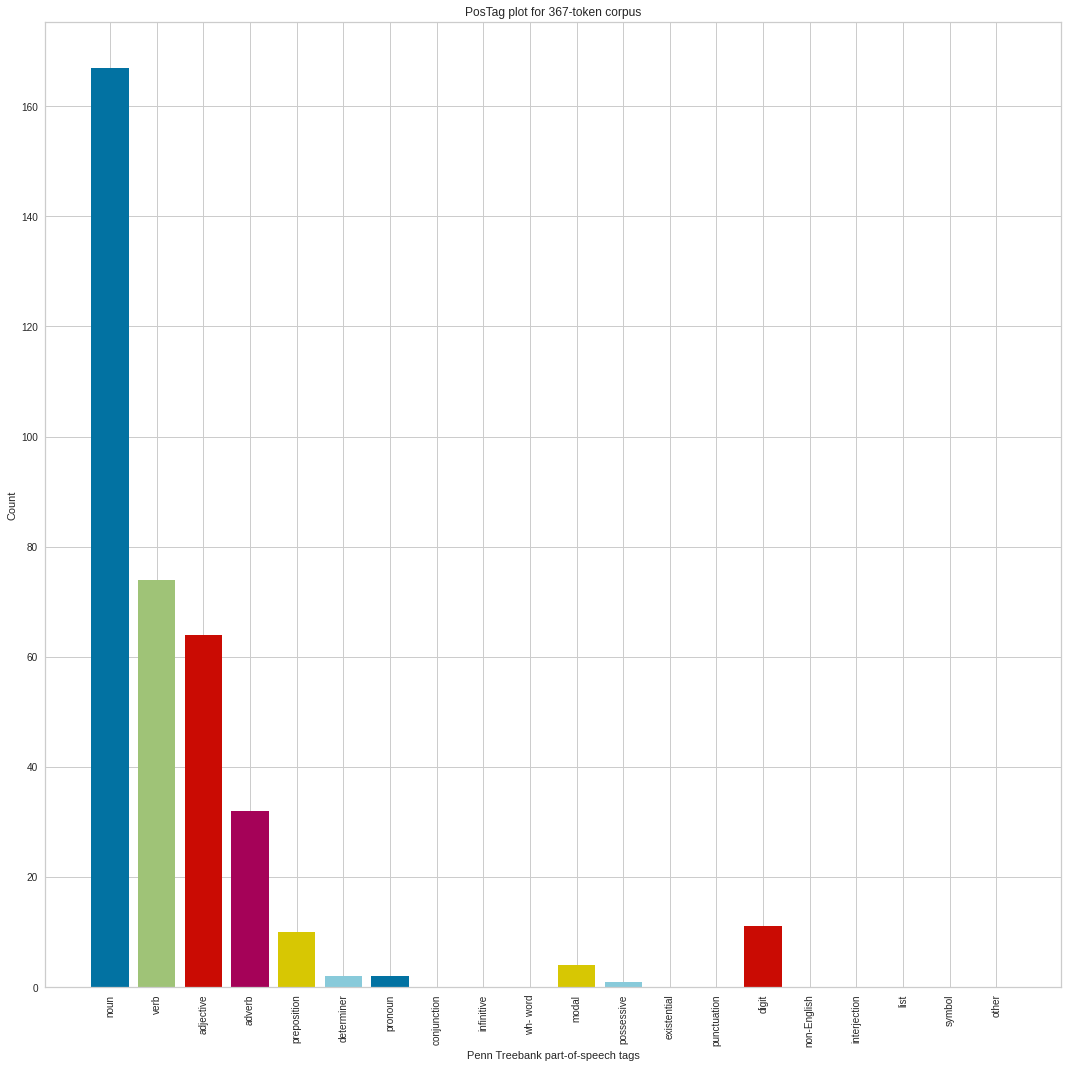

In [94]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(positive_tagged)
viz.show()

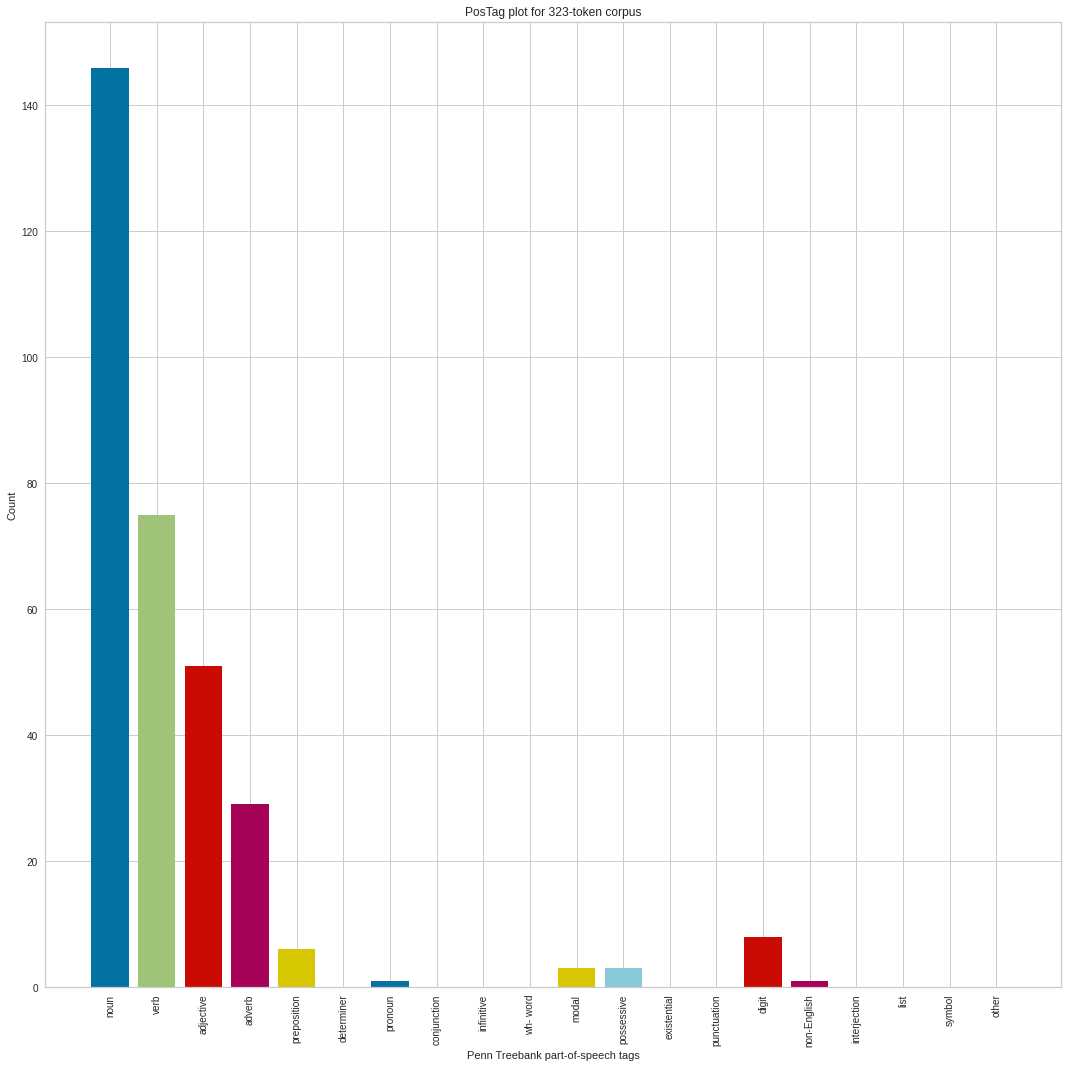

In [95]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(negative_tagged)
viz.show()

#### Dependency Parsing

In [96]:
# Most followed user tweet analysis  Followers_count

most_followed_positive = positives_df_NLTK[positives_df_NLTK['Followers_count']== positives_df_NLTK['Followers_count'].max()]

most_followed_negative = negativies_df_NLTK[negativies_df_NLTK['Followers_count']== negativies_df_NLTK['Followers_count'].max()]

In [97]:
most_followed_positive

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
9,2021-07-22 23:59:55,BagaiDr,Optimizing testing for COVID-19 in India https://t.co/MLom1osPCv,[],33336,0.4588,positive,NLTK


In [98]:
most_followed_negative

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
42,2021-07-22 23:59:44,bobsansevere,So I pull into a McDonalds in Bofuck IA No counter help Just kiosks This is the future and McD’s answer to the $15 an hour outcry Also woman walks in coughs No mask No attempt to cover the cough Just coughs I can only assume news of COVID never reached Bofuck IA.,[],8499,-0.7576,strongly_negative,NLTK


In [99]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_positive['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  Optimizing testing for COVID-19 in India https://t.co/MLom1osPCv


In [100]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_negative['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  So I pull into a McDonalds in Bofuck IA No counter help Just kiosks This is the future and McD’s answer to the $15 an hour outcry Also woman walks in coughs No mask No attempt to cover the cough Just coughs I can only assume news of COVID never reached Bofuck IA.


### RNN

In [228]:
# Dataframes only about the negative and positive tweets separately


positives_df_RNN = twitter_dataframe_RNN.loc[(twitter_dataframe_RNN['Sentiment'].str.contains("Positive", case=False, na=False))]

negativies_df_RNN = twitter_dataframe_RNN.loc[(twitter_dataframe_RNN['Sentiment'].str.contains("Negative", case=False, na=False))]

In [229]:
# Initializing a new dataframe with only the 'Tweet_text' column for faster operation

positive_tweet_text_df_RNN = positives_df_RNN['Tweet_text']
positive_tweet_text_df_RNN = positive_tweet_text_df_RNN.to_frame()

negative_tweet_text_df_RNN = negativies_df_RNN['Tweet_text']
negative_tweet_text_df_RNN = negative_tweet_text_df_RNN.to_frame()

In [230]:
positive_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text
312,I feel like I was out a lot when covid was at its prime fr But now that my brother is back home full time I been real good with staying indoors and I’m proud of myself :)
209,One of my senior clients was supposed to be gone this next week to visit kids/grandkids Just messaged me that he had to stay home because they are all infected with Covid and all had the shots!
353,Republicans say agreement is close Except for transit And broadband And stealing COVID funds https://t.co/zmVRf39aNf
206,_TX Covid cases are increasing in West Texas.
262,"Good for Sean 👏🏼👏🏼 ""Sean Penn Won't Return To Work Until Cast And Crew of Watergate Series 'Gaslit Get Covid Vaccines"" https://t.co/mFf6lHxNCP"
13,Great Yanks...more backbone and brains than us Brits!! Hesitancy battle lost Vast majority of unvaccinated Americans say they WON’T be getting Covid-19 jabs poll shows https://t.co/tpy1fCNL0G
471,covid?
378,Yeah we have our costume plans and covid masks.
113,South Australia records one new case of COVID-19 Coronavirus 9 News Australia https://t.co/g8mGZrlgEb
456,Should you be worried about Covid if you're vaccinated Experts explain breakthrough cases https://t.co/d6uijZasf9 via


In [231]:
negative_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text
267,See this guy right here is why Covid’s a Godsend Gotta flush the turds out once in a while 🌊💩
350,Sounds like way overprotective Covid era parents Karen’s have nothing better to do.
417,Nurse reveals how she pranks Covid deniers who call her a crisis actor https://t.co/xVema95fc4
85,consequences for spreading COVID misinformation college They only named one doctor Dr Charles Hoffe from Lytton The warning from the collage of physicians did not stop him and other doctors from trying to warn people Do you suppose maybe someone was trying to get the
349,Absolutely true … Covid shots make you mean.
273,_TX COVID-19 cases are RISING while you do nothing Power grid STILL isn't fixed Seems like you're doing everything you can to torpedo TEXAS'S economic progress SAD Stop tweeting and do your job.
276,Yes but can't imagine ever being asked for it The country has opened up regardless and most seem to think that means covid has gone.
241,Bro the NFL is about to be a hot mess this season with these COVID rules and anti-vaxxers.
453,_Drumpf I doubt you've really looked into this case It's not apples to apples They had a chance to have the same contract as the men and they chose not to do it There's also the issue of FIFA which is not ruled by the United States.
443,_Airways we returned home on BA2645 tonight 24 hrs before the flight I received a text asking me to download the VeriFLY app to upload proof of vaccination and negative COVID tests etc only to get to the airport for the check in agent to tell me he’s not trained for it?


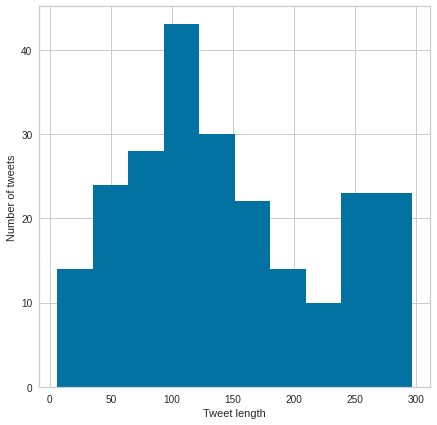

In [232]:
# Visualization of the 'Tweet_text' legth - positive

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

positive_tweet_text_df_RNN['Tweet_text'].str.len().hist()

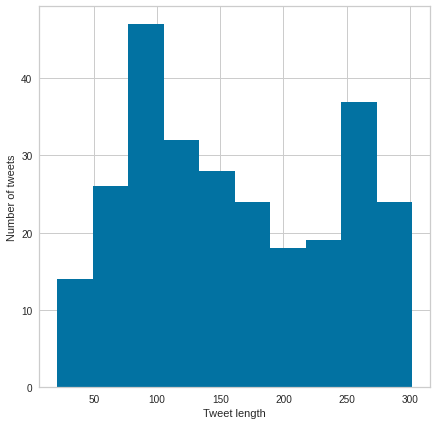

In [233]:
# Visualization of the 'Tweet_text' legth - negative

plt.figure(figsize=(7,7))
plt.xlabel("Tweet length")
plt.ylabel("Number of tweets")

negative_tweet_text_df_RNN['Tweet_text'].str.len().hist()

#### Part of Speech Tagging

In [234]:
# Noise Cleaning - spacing, special characters, lowercasing

positive_tweet_text_df_RNN['Tweet_text'] = positive_tweet_text_df_RNN['Tweet_text'].str.lower()
positive_tweet_text_df_RNN['Tweet_text'] = positive_tweet_text_df_RNN['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

negative_tweet_text_df_RNN['Tweet_text'] = negative_tweet_text_df_RNN['Tweet_text'].str.lower()
negative_tweet_text_df_RNN['Tweet_text'] = negative_tweet_text_df_RNN['Tweet_text'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))

In [235]:
positive_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text
312,i feel like i was out a lot when covid was at its prime fr but now that my brother is back home full time i been real good with staying indoors and im proud of myself
209,one of my senior clients was supposed to be gone this next week to visit kidsgrandkids just messaged me that he had to stay home because they are all infected with covid and all had the shots
353,republicans say agreement is close except for transit and broadband and stealing covid funds httpstcozmvrf39anf
206,_tx covid cases are increasing in west texas
262,good for sean sean penn won't return to work until cast and crew of watergate series 'gaslit get covid vaccines httpstcomff6lhxncp
13,great yanksmore backbone and brains than us brits hesitancy battle lost vast majority of unvaccinated americans say they wont be getting covid19 jabs poll shows httpstcotpy1fcnl0g
471,covid
378,yeah we have our costume plans and covid masks
113,south australia records one new case of covid19 coronavirus 9 news australia httpstcog8mgzrlgeb
456,should you be worried about covid if you're vaccinated experts explain breakthrough cases httpstcod6uijzasf9 via


In [236]:
negative_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text
267,see this guy right here is why covids a godsend gotta flush the turds out once in a while
350,sounds like way overprotective covid era parents karens have nothing better to do
417,nurse reveals how she pranks covid deniers who call her a crisis actor httpstcoxvema95fc4
85,consequences for spreading covid misinformation college they only named one doctor dr charles hoffe from lytton the warning from the collage of physicians did not stop him and other doctors from trying to warn people do you suppose maybe someone was trying to get the
349,absolutely true covid shots make you mean
273,_tx covid19 cases are rising while you do nothing power grid still isn't fixed seems like you're doing everything you can to torpedo texas's economic progress sad stop tweeting and do your job
276,yes but can't imagine ever being asked for it the country has opened up regardless and most seem to think that means covid has gone
241,bro the nfl is about to be a hot mess this season with these covid rules and antivaxxers
453,_drumpf i doubt you've really looked into this case it's not apples to apples they had a chance to have the same contract as the men and they chose not to do it there's also the issue of fifa which is not ruled by the united states
443,_airways we returned home on ba2645 tonight 24 hrs before the flight i received a text asking me to download the verifly app to upload proof of vaccination and negative covid tests etc only to get to the airport for the check in agent to tell me hes not trained for it


In [237]:
# NLTK tokenization

positive_tweet_text_df_RNN['tokenized_Tweet_text'] = positive_tweet_text_df_RNN['Tweet_text'].apply(word_tokenize)

negative_tweet_text_df_RNN['tokenized_Tweet_text'] = negative_tweet_text_df_RNN['Tweet_text'].apply(word_tokenize)

In [238]:
positive_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
312,i feel like i was out a lot when covid was at its prime fr but now that my brother is back home full time i been real good with staying indoors and im proud of myself,"[i, feel, like, i, was, out, a, lot, when, covid, was, at, its, prime, fr, but, now, that, my, brother, is, back, home, full, time, i, been, real, good, with, staying, indoors, and, im, proud, of, myself]"
209,one of my senior clients was supposed to be gone this next week to visit kidsgrandkids just messaged me that he had to stay home because they are all infected with covid and all had the shots,"[one, of, my, senior, clients, was, supposed, to, be, gone, this, next, week, to, visit, kidsgrandkids, just, messaged, me, that, he, had, to, stay, home, because, they, are, all, infected, with, covid, and, all, had, the, shots]"
353,republicans say agreement is close except for transit and broadband and stealing covid funds httpstcozmvrf39anf,"[republicans, say, agreement, is, close, except, for, transit, and, broadband, and, stealing, covid, funds, httpstcozmvrf39anf]"
206,_tx covid cases are increasing in west texas,"[_tx, covid, cases, are, increasing, in, west, texas]"
262,good for sean sean penn won't return to work until cast and crew of watergate series 'gaslit get covid vaccines httpstcomff6lhxncp,"[good, for, sean, sean, penn, wo, n't, return, to, work, until, cast, and, crew, of, watergate, series, 'gaslit, get, covid, vaccines, httpstcomff6lhxncp]"
13,great yanksmore backbone and brains than us brits hesitancy battle lost vast majority of unvaccinated americans say they wont be getting covid19 jabs poll shows httpstcotpy1fcnl0g,"[great, yanksmore, backbone, and, brains, than, us, brits, hesitancy, battle, lost, vast, majority, of, unvaccinated, americans, say, they, wont, be, getting, covid19, jabs, poll, shows, httpstcotpy1fcnl0g]"
471,covid,[covid]
378,yeah we have our costume plans and covid masks,"[yeah, we, have, our, costume, plans, and, covid, masks]"
113,south australia records one new case of covid19 coronavirus 9 news australia httpstcog8mgzrlgeb,"[south, australia, records, one, new, case, of, covid19, coronavirus, 9, news, australia, httpstcog8mgzrlgeb]"
456,should you be worried about covid if you're vaccinated experts explain breakthrough cases httpstcod6uijzasf9 via,"[should, you, be, worried, about, covid, if, you, 're, vaccinated, experts, explain, breakthrough, cases, httpstcod6uijzasf9, via]"


In [239]:
negative_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text
267,see this guy right here is why covids a godsend gotta flush the turds out once in a while,"[see, this, guy, right, here, is, why, covids, a, godsend, got, ta, flush, the, turds, out, once, in, a, while]"
350,sounds like way overprotective covid era parents karens have nothing better to do,"[sounds, like, way, overprotective, covid, era, parents, karens, have, nothing, better, to, do]"
417,nurse reveals how she pranks covid deniers who call her a crisis actor httpstcoxvema95fc4,"[nurse, reveals, how, she, pranks, covid, deniers, who, call, her, a, crisis, actor, httpstcoxvema95fc4]"
85,consequences for spreading covid misinformation college they only named one doctor dr charles hoffe from lytton the warning from the collage of physicians did not stop him and other doctors from trying to warn people do you suppose maybe someone was trying to get the,"[consequences, for, spreading, covid, misinformation, college, they, only, named, one, doctor, dr, charles, hoffe, from, lytton, the, warning, from, the, collage, of, physicians, did, not, stop, him, and, other, doctors, from, trying, to, warn, people, do, you, suppose, maybe, someone, was, trying, to, get, the]"
349,absolutely true covid shots make you mean,"[absolutely, true, covid, shots, make, you, mean]"
273,_tx covid19 cases are rising while you do nothing power grid still isn't fixed seems like you're doing everything you can to torpedo texas's economic progress sad stop tweeting and do your job,"[_tx, covid19, cases, are, rising, while, you, do, nothing, power, grid, still, is, n't, fixed, seems, like, you, 're, doing, everything, you, can, to, torpedo, texas, 's, economic, progress, sad, stop, tweeting, and, do, your, job]"
276,yes but can't imagine ever being asked for it the country has opened up regardless and most seem to think that means covid has gone,"[yes, but, ca, n't, imagine, ever, being, asked, for, it, the, country, has, opened, up, regardless, and, most, seem, to, think, that, means, covid, has, gone]"
241,bro the nfl is about to be a hot mess this season with these covid rules and antivaxxers,"[bro, the, nfl, is, about, to, be, a, hot, mess, this, season, with, these, covid, rules, and, antivaxxers]"
453,_drumpf i doubt you've really looked into this case it's not apples to apples they had a chance to have the same contract as the men and they chose not to do it there's also the issue of fifa which is not ruled by the united states,"[_drumpf, i, doubt, you, 've, really, looked, into, this, case, it, 's, not, apples, to, apples, they, had, a, chance, to, have, the, same, contract, as, the, men, and, they, chose, not, to, do, it, there, 's, also, the, issue, of, fifa, which, is, not, ruled, by, the, united, states]"
443,_airways we returned home on ba2645 tonight 24 hrs before the flight i received a text asking me to download the verifly app to upload proof of vaccination and negative covid tests etc only to get to the airport for the check in agent to tell me hes not trained for it,"[_airways, we, returned, home, on, ba2645, tonight, 24, hrs, before, the, flight, i, received, a, text, asking, me, to, download, the, verifly, app, to, upload, proof, of, vaccination, and, negative, covid, tests, etc, only, to, get, to, the, airport, for, the, check, in, agent, to, tell, me, hes, not, trained, for, it]"


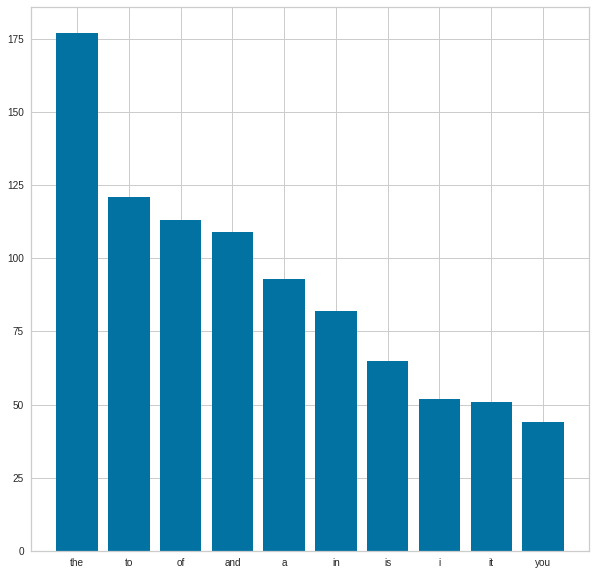

In [243]:
# Top Stopwords - Positive tweets

plot_top_stopwords_barchart(positive_tweet_text_df_RNN['Tweet_text'])

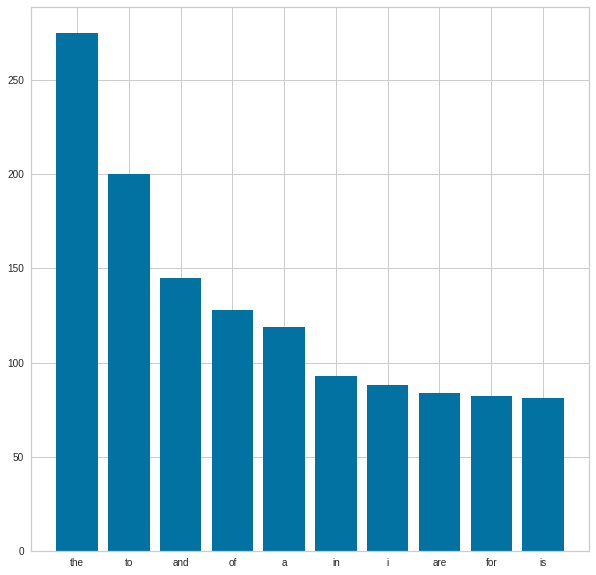

In [244]:
# Top Stopwords - Nagative tweets

plot_top_stopwords_barchart(negative_tweet_text_df_RNN['Tweet_text'])

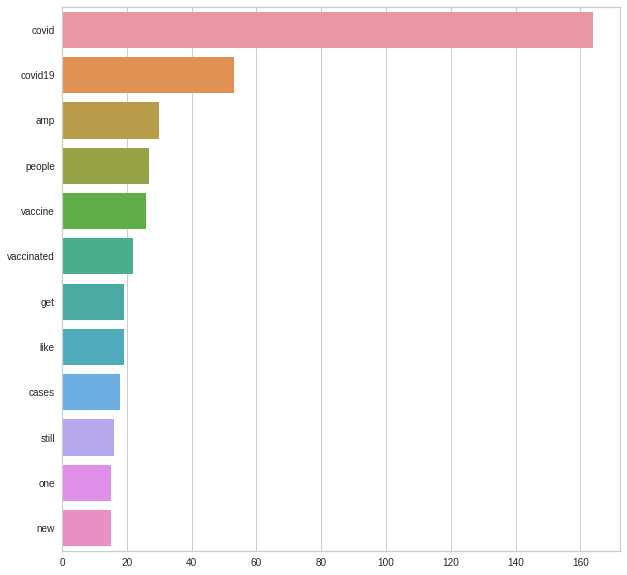

In [245]:
# Top NON Stopwords - Positive tweets

plot_top_non_stopwords_barchart(positive_tweet_text_df_RNN['Tweet_text'])

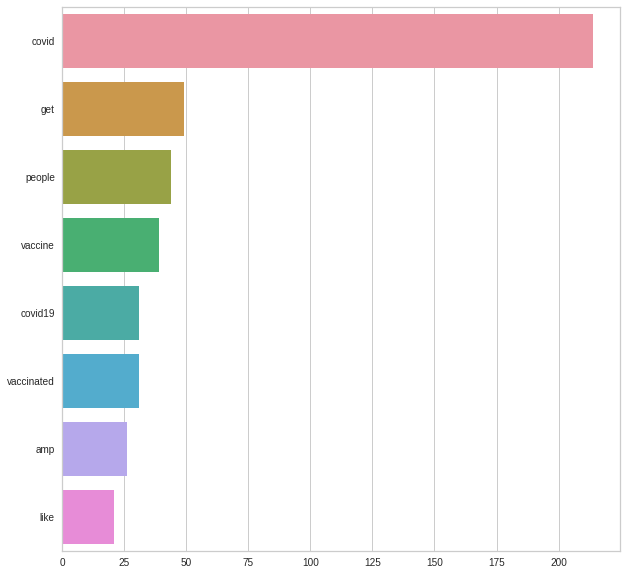

In [246]:
# Top NON Stopwords - Negative tweets

plot_top_non_stopwords_barchart(negative_tweet_text_df_RNN['Tweet_text'])

In [247]:
# Removing stopwords

positive_tweet_text_df_RNN['tokenized_Tweet_text'] = positive_tweet_text_df_RNN['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
positive_tweet_text_df_RNN['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in positive_tweet_text_df_RNN['tokenized_Tweet_text']]

negative_tweet_text_df_RNN['tokenized_Tweet_text'] = negative_tweet_text_df_RNN['tokenized_Tweet_text'].apply(lambda x: [word for word in x if word not in stop_words])
negative_tweet_text_df_RNN['tokenized_Tweet_text_join'] = [' '.join(map(str, l)) for l in negative_tweet_text_df_RNN['tokenized_Tweet_text']]

In [248]:
positive_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
312,i feel like i was out a lot when covid was at its prime fr but now that my brother is back home full time i been real good with staying indoors and im proud of myself,"[feel, like, lot, covid, prime, fr, brother, back, home, full, time, real, good, staying, indoors, im, proud]",feel like lot covid prime fr brother back home full time real good staying indoors im proud
209,one of my senior clients was supposed to be gone this next week to visit kidsgrandkids just messaged me that he had to stay home because they are all infected with covid and all had the shots,"[one, senior, clients, supposed, gone, next, week, visit, kidsgrandkids, messaged, stay, home, infected, covid, shots]",one senior clients supposed gone next week visit kidsgrandkids messaged stay home infected covid shots
353,republicans say agreement is close except for transit and broadband and stealing covid funds httpstcozmvrf39anf,"[republicans, say, agreement, close, except, transit, broadband, stealing, covid, funds, httpstcozmvrf39anf]",republicans say agreement close except transit broadband stealing covid funds httpstcozmvrf39anf
206,_tx covid cases are increasing in west texas,"[_tx, covid, cases, increasing, west, texas]",_tx covid cases increasing west texas
262,good for sean sean penn won't return to work until cast and crew of watergate series 'gaslit get covid vaccines httpstcomff6lhxncp,"[good, sean, sean, penn, wo, n't, return, work, cast, crew, watergate, series, 'gaslit, get, covid, vaccines, httpstcomff6lhxncp]",good sean sean penn wo n't return work cast crew watergate series 'gaslit get covid vaccines httpstcomff6lhxncp
13,great yanksmore backbone and brains than us brits hesitancy battle lost vast majority of unvaccinated americans say they wont be getting covid19 jabs poll shows httpstcotpy1fcnl0g,"[great, yanksmore, backbone, brains, us, brits, hesitancy, battle, lost, vast, majority, unvaccinated, americans, say, wont, getting, covid19, jabs, poll, shows, httpstcotpy1fcnl0g]",great yanksmore backbone brains us brits hesitancy battle lost vast majority unvaccinated americans say wont getting covid19 jabs poll shows httpstcotpy1fcnl0g
471,covid,[covid],covid
378,yeah we have our costume plans and covid masks,"[yeah, costume, plans, covid, masks]",yeah costume plans covid masks
113,south australia records one new case of covid19 coronavirus 9 news australia httpstcog8mgzrlgeb,"[south, australia, records, one, new, case, covid19, coronavirus, 9, news, australia, httpstcog8mgzrlgeb]",south australia records one new case covid19 coronavirus 9 news australia httpstcog8mgzrlgeb
456,should you be worried about covid if you're vaccinated experts explain breakthrough cases httpstcod6uijzasf9 via,"[worried, covid, 're, vaccinated, experts, explain, breakthrough, cases, httpstcod6uijzasf9, via]",worried covid 're vaccinated experts explain breakthrough cases httpstcod6uijzasf9 via


In [249]:
negative_tweet_text_df_RNN.sample(10, random_state = 5)

,Tweet_text,tokenized_Tweet_text,tokenized_Tweet_text_join
267,see this guy right here is why covids a godsend gotta flush the turds out once in a while,"[see, guy, right, covids, godsend, got, ta, flush, turds]",see guy right covids godsend got ta flush turds
350,sounds like way overprotective covid era parents karens have nothing better to do,"[sounds, like, way, overprotective, covid, era, parents, karens, nothing, better]",sounds like way overprotective covid era parents karens nothing better
417,nurse reveals how she pranks covid deniers who call her a crisis actor httpstcoxvema95fc4,"[nurse, reveals, pranks, covid, deniers, call, crisis, actor, httpstcoxvema95fc4]",nurse reveals pranks covid deniers call crisis actor httpstcoxvema95fc4
85,consequences for spreading covid misinformation college they only named one doctor dr charles hoffe from lytton the warning from the collage of physicians did not stop him and other doctors from trying to warn people do you suppose maybe someone was trying to get the,"[consequences, spreading, covid, misinformation, college, named, one, doctor, dr, charles, hoffe, lytton, warning, collage, physicians, stop, doctors, trying, warn, people, suppose, maybe, someone, trying, get]",consequences spreading covid misinformation college named one doctor dr charles hoffe lytton warning collage physicians stop doctors trying warn people suppose maybe someone trying get
349,absolutely true covid shots make you mean,"[absolutely, true, covid, shots, make, mean]",absolutely true covid shots make mean
273,_tx covid19 cases are rising while you do nothing power grid still isn't fixed seems like you're doing everything you can to torpedo texas's economic progress sad stop tweeting and do your job,"[_tx, covid19, cases, rising, nothing, power, grid, still, n't, fixed, seems, like, 're, everything, torpedo, texas, 's, economic, progress, sad, stop, tweeting, job]",_tx covid19 cases rising nothing power grid still n't fixed seems like 're everything torpedo texas 's economic progress sad stop tweeting job
276,yes but can't imagine ever being asked for it the country has opened up regardless and most seem to think that means covid has gone,"[yes, ca, n't, imagine, ever, asked, country, opened, regardless, seem, think, means, covid, gone]",yes ca n't imagine ever asked country opened regardless seem think means covid gone
241,bro the nfl is about to be a hot mess this season with these covid rules and antivaxxers,"[bro, nfl, hot, mess, season, covid, rules, antivaxxers]",bro nfl hot mess season covid rules antivaxxers
453,_drumpf i doubt you've really looked into this case it's not apples to apples they had a chance to have the same contract as the men and they chose not to do it there's also the issue of fifa which is not ruled by the united states,"[_drumpf, doubt, 've, really, looked, case, 's, apples, apples, chance, contract, men, chose, 's, also, issue, fifa, ruled, united, states]",_drumpf doubt 've really looked case 's apples apples chance contract men chose 's also issue fifa ruled united states
443,_airways we returned home on ba2645 tonight 24 hrs before the flight i received a text asking me to download the verifly app to upload proof of vaccination and negative covid tests etc only to get to the airport for the check in agent to tell me hes not trained for it,"[_airways, returned, home, ba2645, tonight, 24, hrs, flight, received, text, asking, download, verifly, app, upload, proof, vaccination, negative, covid, tests, etc, get, airport, check, agent, tell, hes, trained]",_airways returned home ba2645 tonight 24 hrs flight received text asking download verifly app upload proof vaccination negative covid tests etc get airport check agent tell hes trained


In [250]:
positive_tagged_stanzas = []
positive_tagged = []

for word in positive_tweet_text_df_RNN['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  positive_tagged_stanzas.append(tagged_word)

positive_tagged.append(positive_tagged_stanzas)

In [251]:
negative_tagged_stanzas = []
negative_tagged = []

for word in negative_tweet_text_df_RNN['tokenized_Tweet_text']:
  tagged_word = nltk.pos_tag(word)
  negative_tagged_stanzas.append(tagged_word)

negative_tagged.append(negative_tagged_stanzas)

In [257]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(positive_tagged)
viz.show()

AttributeError: ignored

<Figure size 1080x1080 with 0 Axes>

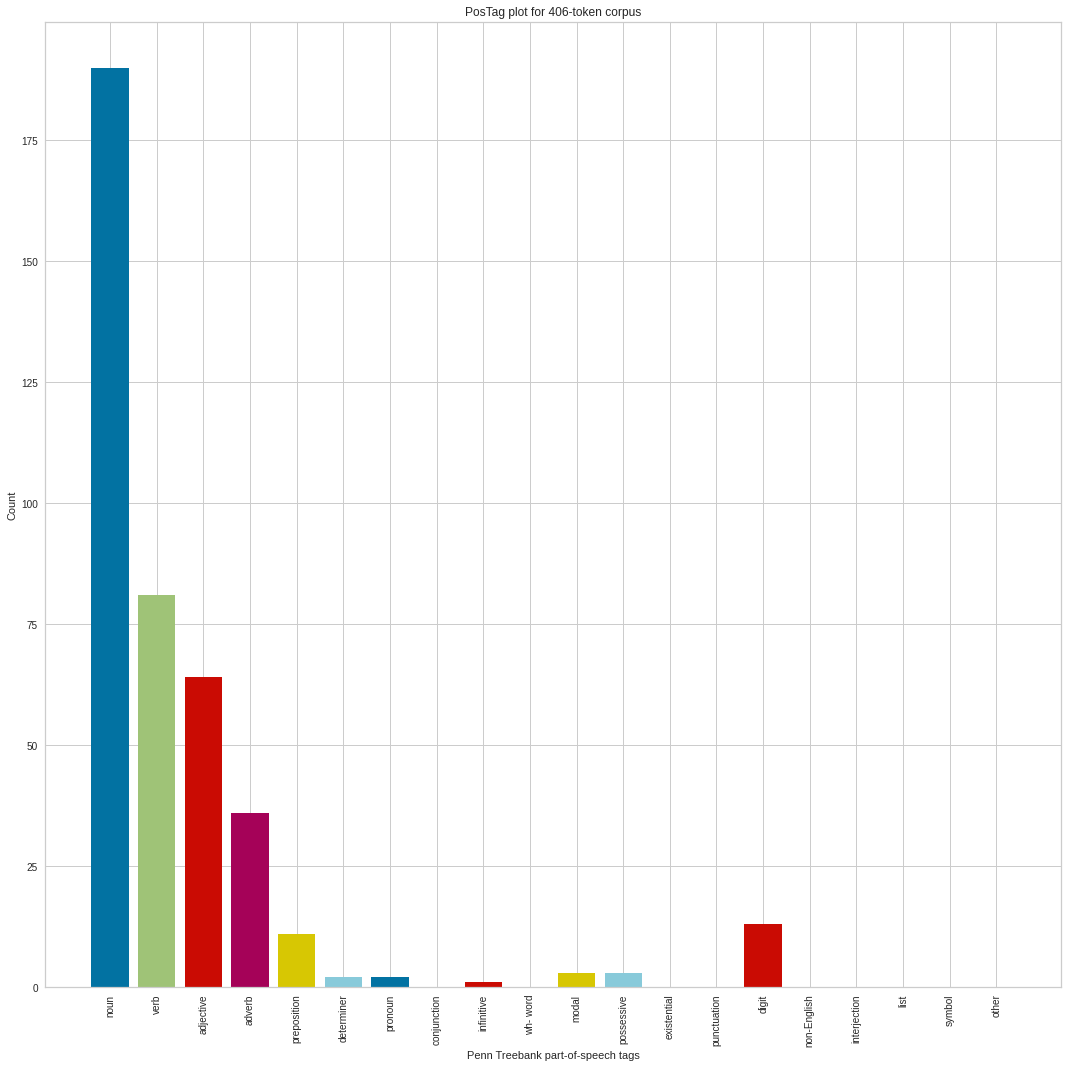

In [123]:
plt.figure(figsize=(15,15))
viz = PosTagVisualizer()
viz.fit(negative_tagged)
viz.show()

#### Dependency Parsing

In [124]:
# Most followed user tweet analysis  Followers_count

most_followed_positive = positives_df_RNN[positives_df_RNN['Followers_count']== positives_df_RNN['Followers_count'].max()]

most_followed_negative = negativies_df_RNN[negativies_df_RNN['Followers_count']== negativies_df_RNN['Followers_count'].max()]

In [125]:
most_followed_positive

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
48,2021-07-22 23:59:43,Cleavon_MD,The lightning-fast quest for COVID vaccines and what it means for other diseases https://t.co/jkLupy6HWC,[],156491,0.796125,positive,RNN


In [126]:
most_followed_negative

,Time,UserName,Tweet_text,All_Hashtags,Followers_count,Compound,Sentiment,Tool
42,2021-07-22 23:59:44,bobsansevere,So I pull into a McDonalds in Bofuck IA No counter help Just kiosks This is the future and McD’s answer to the $15 an hour outcry Also woman walks in coughs No mask No attempt to cover the cough Just coughs I can only assume news of COVID never reached Bofuck IA.,[],8499,0.133511,negative,RNN


In [127]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_positive['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  The lightning-fast quest for COVID vaccines and what it means for other diseases https://t.co/jkLupy6HWC


In [128]:
pd.set_option('display.max_colwidth', None)
sentence_doc = nlp(str(most_followed_negative['Tweet_text'].to_string(index=False).strip()))

displacy.render(sentence_doc, style='dep', jupyter=True)
print("Sentence is: ", sentence_doc)

Sentence is:  So I pull into a McDonalds in Bofuck IA No counter help Just kiosks This is the future and McD’s answer to the $15 an hour outcry Also woman walks in coughs No mask No attempt to cover the cough Just coughs I can only assume news of COVID never reached Bofuck IA.


## Named Entity Recognition (NER)

### Imports

In [214]:
!pip install tqdm

In [258]:
from tqdm import tqdm, tqdm_notebook

In [259]:
nlp = spacy.load('en',
                 disable=['parser', 
                          'tagger',
                          'textcat'])

### Helper Methods

In [260]:
def ner_extraction(data_from_dataframe):
  for sentence in data_from_dataframe:
    print("Sentence is: ", sentence)
    sentence_doc = nlp(sentence)
    displacy.render(sentence_doc,style='ent',jupyter=True)

In [261]:
# Index setup
def dataframe_index_setup(dataframe):
  dataframe['id'] = np.arange(1, dataframe.shape[0] + 1)
  dataframe.set_index('id')
  dataframe.reset_index(drop=True, inplace=True)

In [262]:
def frame_setup(dataframe):
  frames = []
  for i in tqdm_notebook(range(len(dataframe))):
      doc = dataframe.loc[i,'Tweet_text']
      text_id = dataframe.loc[i,'id']
      doc = nlp(doc)

      ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
      frame = pd.DataFrame(ents)
      frame['id'] = text_id
      frames.append(frame)
  return frames

### NER

In [ ]:
ner_extraction(negativies_df_RNN['Tweet_text'])

In [ ]:
ner_extraction(negativies_df_RNN['Tweet_text'])

In [ ]:
dataframe_index_setup(positives_df_RNN)

In [ ]:
dataframe_index_setup(negativies_df_RNN)

In [286]:
frames_positives = frame_setup(positives_df_RNN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [287]:
frames_negativies = frame_setup(negativies_df_RNN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [288]:
ner_positives = pd.concat(frames_positives)
ner_positives.columns = ['Text','Start','Stop','NER_Type','id']
ner_positives.tail()

,Text,Start,Stop,NER_Type,id
1,COVID,63.0,68.0,ORG,227
0,49,0.0,2.0,CARDINAL,230
1,New Jersey,20.0,30.0,GPE,230
0,Americans,38.0,47.0,NORP,231
1,Need Booster Shots,51.0,69.0,PERSON,231


In [289]:
ner_negativies = pd.concat(frames_negativies)
ner_negativies.columns = ['Text','Start','Stop','NER_Type','id']
ner_negativies.tail()

,Text,Start,Stop,NER_Type,id
0,first,76.0,81.0,ORDINAL,263
0,two,53.0,56.0,CARDINAL,264
0,joma Far,1.0,9.0,ORG,266
0,Americans,38.0,47.0,NORP,268
0,1984,1.0,5.0,DATE,269


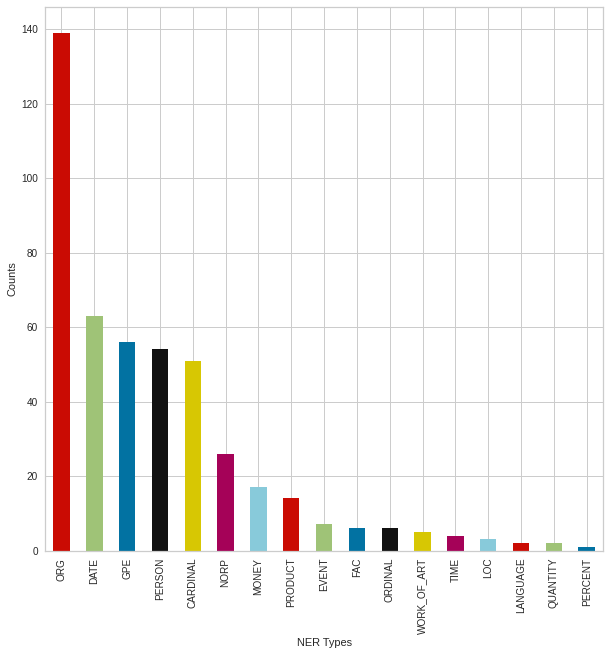

In [290]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner_positives.NER_Type.value_counts().plot(kind='bar', color = color_list)

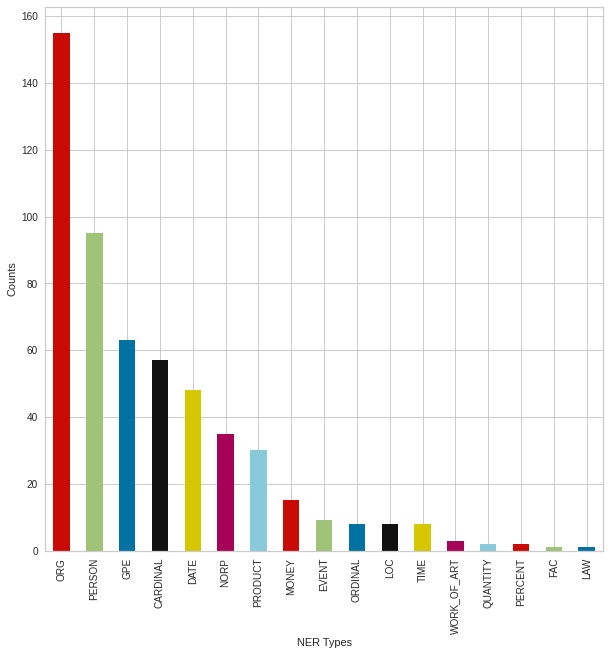

In [291]:
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner_negativies.NER_Type.value_counts().plot(kind='bar', color = color_list)

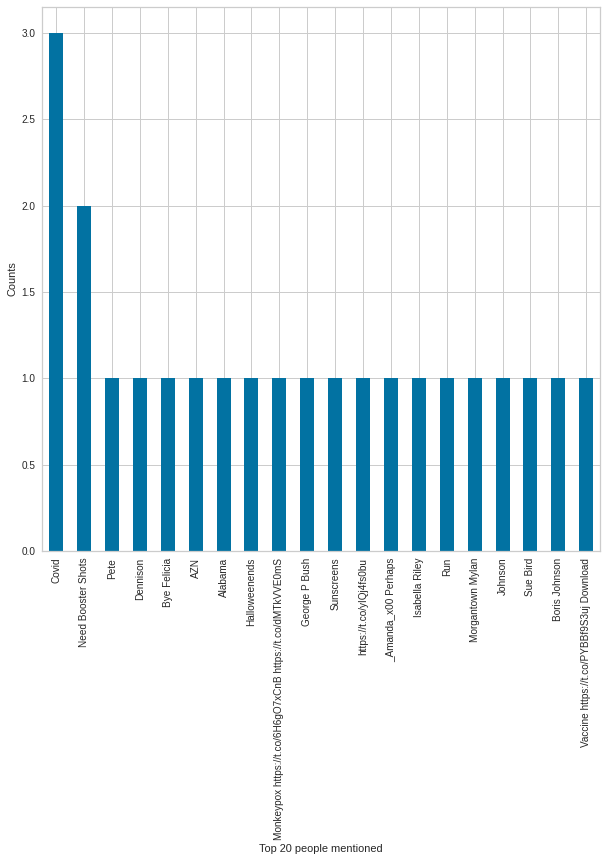

In [292]:
person_positives = ner_positives[ner_positives.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person_positives.Text.value_counts()[:20].plot(kind='bar')

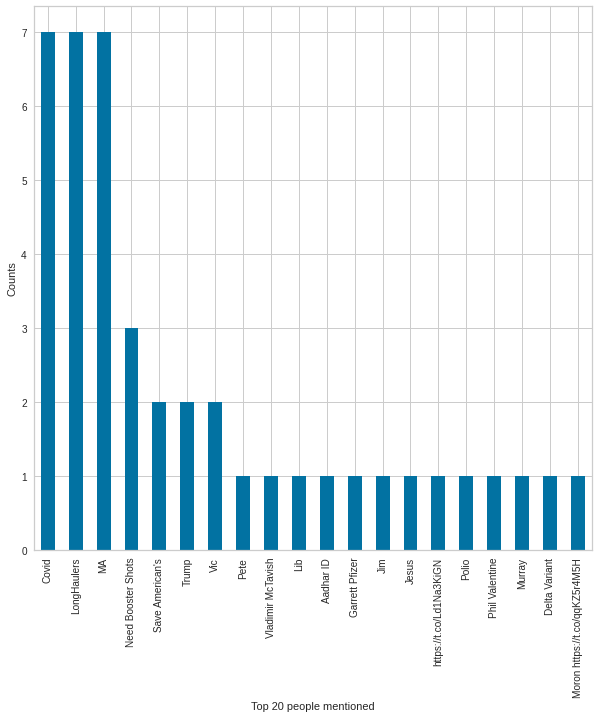

In [293]:
person_negativies = ner_negativies[ner_negativies.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person_negativies.Text.value_counts()[:20].plot(kind='bar')

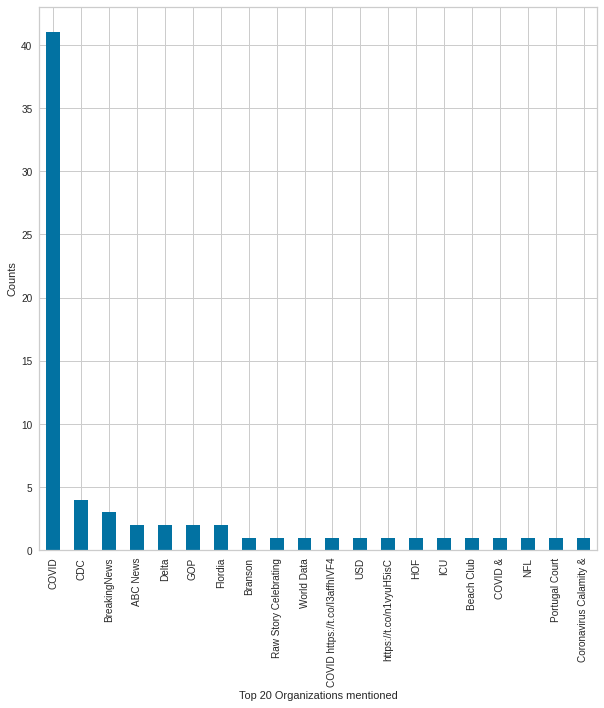

In [294]:
orgs_positives = ner_positives[ner_positives.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Organizations mentioned")
plt.ylabel("Counts")

orgs_positives.Text.value_counts()[:20].plot(kind='bar')

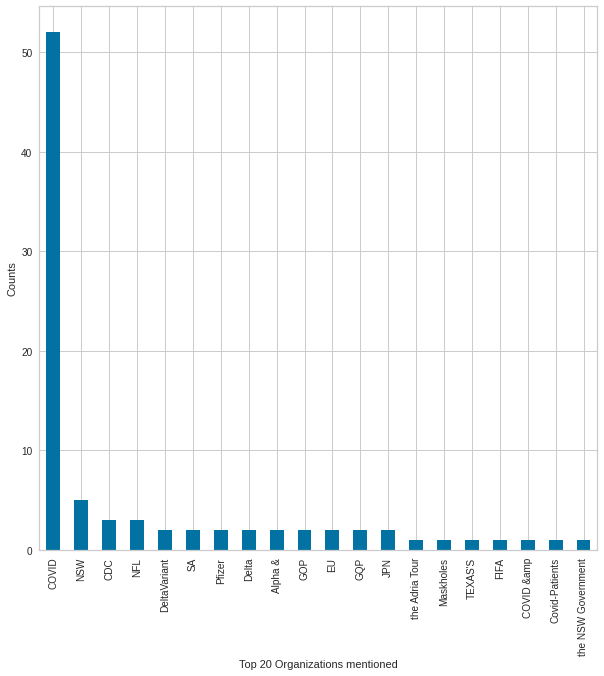

In [295]:
orgs_negativies = ner_negativies[ner_negativies.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Organizations mentioned")
plt.ylabel("Counts")

orgs_negativies.Text.value_counts()[:20].plot(kind='bar')

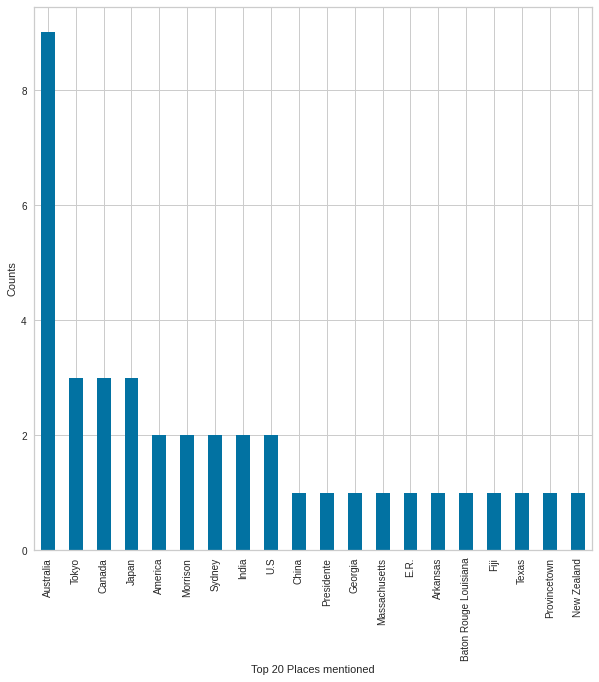

In [296]:
place_positives = ner_positives[ner_positives.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place_positives.Text.value_counts()[:20].plot(kind='bar')

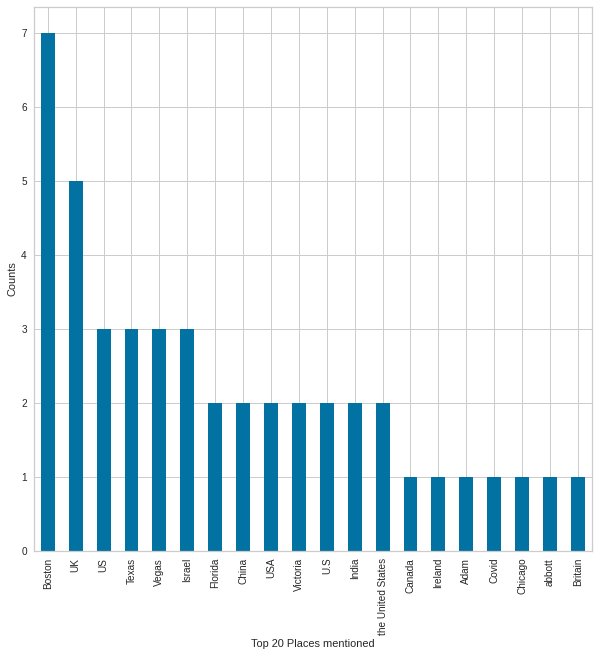

In [297]:
place_negativies = ner_negativies[ner_negativies.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place_negativies.Text.value_counts()[:20].plot(kind='bar')